## Data Gathering

- I have used mixed approach to extract data like python & JS
- Data extacted from smartprix.com/laptops
- For cleaning I've used pandas mostly but also excel in some cases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('smartprix_laptop.xlsx')

In [3]:
df

,productName,price,rating,specScore,features
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12t...,"₹69,990",4.60,69.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12t...,"₹74,990",4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD ...,"₹28,660",4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Th..."
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen ...,"₹57,990",4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (..."
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,"₹24,990",4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, ..."
...,...,...,...,...,...
1015,MSI Vector GP68 HX 13VG-214IN Gaming Laptop (1...,"₹1,49,990",4.50,77.0,"['13th Gen Intel Core i7 13700HX', '16 Cores (..."
1016,Asus Vivobook 15X OLED M3504YA-LK552WS Laptop ...,"₹58,990",4.10,61.0,"['7th Gen AMD Ryzen 5 7530U', 'Hexa Core, 12 T..."
1017,Lenovo IdeaPad 3 15IAU7 82RK00WXIN Laptop (12t...,"₹33,999",4.30,53.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2..."
1018,Lenovo IdeaPad 1 15AMN7 82VG00ERIN Laptop (AMD...,"₹31,890",4.25,51.0,"['7th Gen AMD Ryzen 3 7320U', 'Quad Core, 8 Th..."


## Data Assesment & Cleaning

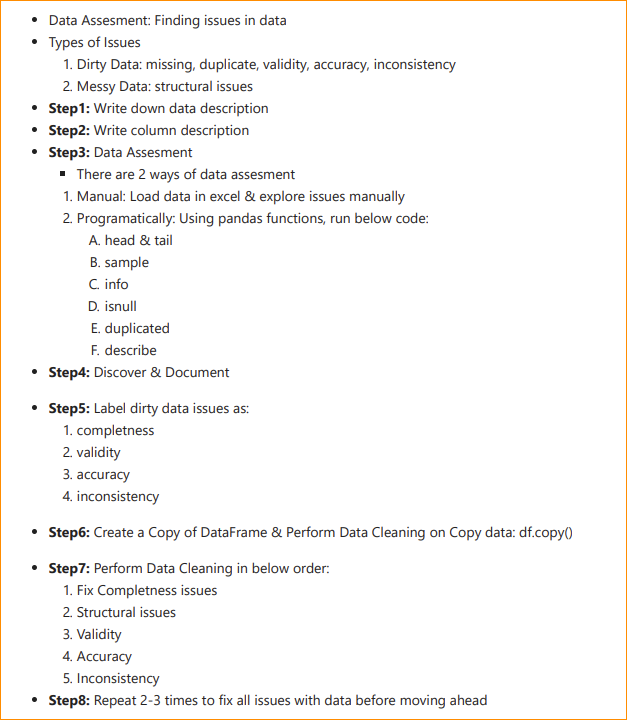

### data description

- Laptop Data extracted from SmartPrix.com
1. productName: Laptop brand, model name, generation, ram rom, windows, graphics etc
2. price: price of laptop
3. rating: rating
4. specScore: specScore
5. features: lapotp features

### issues in data

1. dirty data
    - remove ₹ sign in price & make it float
    - 2 missing value in specScore

2. messy data
    - product name & features have multiple info, need to seperate them into new columns

### data assesment iteration 1

In [4]:
df.head()

,productName,price,rating,specScore,features
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12t...,"₹69,990",4.60,69.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12t...,"₹74,990",4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4..."
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD ...,"₹28,660",4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Th..."
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen ...,"₹57,990",4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (..."
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,"₹24,990",4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, ..."


In [5]:
df.tail()

,productName,price,rating,specScore,features
1015,MSI Vector GP68 HX 13VG-214IN Gaming Laptop (1...,"₹1,49,990",4.50,77.0,"['13th Gen Intel Core i7 13700HX', '16 Cores (..."
1016,Asus Vivobook 15X OLED M3504YA-LK552WS Laptop ...,"₹58,990",4.10,61.0,"['7th Gen AMD Ryzen 5 7530U', 'Hexa Core, 12 T..."
1017,Lenovo IdeaPad 3 15IAU7 82RK00WXIN Laptop (12t...,"₹33,999",4.30,53.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2..."
1018,Lenovo IdeaPad 1 15AMN7 82VG00ERIN Laptop (AMD...,"₹31,890",4.25,51.0,"['7th Gen AMD Ryzen 3 7320U', 'Quad Core, 8 Th..."
1019,HP 250 G9 7M657PA Laptop (12th Gen Core i3/ 8G...,"₹32,490",4.40,56.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2..."


In [6]:
df.sample(7)

,productName,price,rating,specScore,features
517,Infinix Zerobook ZL513 2023 Laptop (13th Gen C...,"₹51,990",4.20,52.0,"['13th Gen Intel Core i5 13500H', '12 Cores (4..."
177,Asus TUF Gaming A15 FA566NFR-HN259W Laptop (AM...,"₹62,990",4.15,66.0,"['7th Gen AMD Ryzen 7 7435HS', 'Octa Core, 16 ..."
710,Microsoft Surface Laptop 7 ‎ZGM-00023 (Snapdra...,"₹1,31,990",4.50,45.0,"['Qualcomm Snapdragon X Plus', '10 Cores', '16..."
835,MSI Pulse 16 AI C1VFKG-030IN Gaming Laptop (In...,"₹1,45,990",4.55,77.0,"['Intel Core Ultra 7 155H', '16 Cores (6P + 8E..."
911,MSI Prestige 16 AI Studio B1VFG 2024 Laptop ( ...,"₹1,87,990",4.40,83.0,"['Intel Core Ultra 9 Series 1 185H', '16 Cores..."
870,Lenovo IdeaPad Slim 3 ‎15IAH8 83ER00BCIN Lapto...,"₹54,390",4.40,57.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (..."
329,HP Pavilion 14-dv2014TU Laptop (12th Gen Core ...,"₹61,400",4.25,61.0,"['12th Gen Intel Core i5 1235U', '10 Cores (2P..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productName  1020 non-null   object 
 1   price        1020 non-null   object 
 2   rating       1020 non-null   float64
 3   specScore    1018 non-null   float64
 4   features     1020 non-null   object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB


In [8]:
df.isnull().sum()

productName    0
price          0
rating         0
specScore      2
features       0
dtype: int64

In [9]:
df.describe()

,rating,specScore
count,1020.000000,1018.000000
mean,4.376422,61.155206
std,0.235795,11.171915
min,3.850000,19.000000
25%,4.200000,54.000000
50%,4.400000,61.000000
75%,4.600000,68.000000
max,4.750000,98.000000


In [10]:
df.duplicated().sum()

74

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(946, 5)

In [13]:
temp_df = df.copy()

### data cleaning iteration 1

In [14]:
temp_df['price'] = temp_df['price'].str.replace("₹","")

In [15]:
temp_df['price'] = temp_df['price'].str.replace(",","")

In [16]:
temp_df['price'] = temp_df['price'].astype('float')

In [17]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productName  946 non-null    object 
 1   price        946 non-null    float64
 2   rating       946 non-null    float64
 3   specScore    945 non-null    float64
 4   features     946 non-null    object 
dtypes: float64(3), object(2)
memory usage: 44.3+ KB


In [18]:
temp_df[temp_df['specScore'].isnull()]

,productName,price,rating,specScore,features
578,Samsung Galaxy Book 3 Laptop (13th Gen Core i5...,69990.0,4.75,NaN,[]


In [19]:
## this row doesnt have feature info along with specscore so its better to remove this row

In [20]:
temp_df = temp_df.dropna(subset=['specScore'])

In [21]:
temp_df.isnull().sum()

productName    0
price          0
rating         0
specScore      0
features       0
dtype: int64

In [22]:
temp_df.describe()

,price,rating,specScore
count,945.00000,945.000000,945.000000
mean,86862.78836,4.371746,61.223280
std,65209.37344,0.232947,11.190657
min,10990.00000,3.850000,19.000000
25%,47900.00000,4.200000,54.000000
50%,66990.00000,4.400000,61.000000
75%,104990.00000,4.550000,68.000000
max,549990.00000,4.750000,98.000000


In [23]:
temp_df.columns

Index(['productName', 'price', 'rating', 'specScore', 'features'], dtype='object')

In [24]:
# display max row & columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [25]:
temp_df['brand'] = temp_df['productName'].str.split(" ").str[0]

In [26]:
temp_df['feature1'] = temp_df['productName'].str.split("Laptop ").str[1]

In [27]:
temp_df['feature1'] = temp_df['feature1'].astype(str).str.split("/")

In [28]:
max_length = temp_df['feature1'].apply(len).max()

In [29]:
split_df = pd.DataFrame(temp_df['feature1'].tolist(), columns=[f'item_{i+1}' for i in range(max_length)])

In [30]:
temp_df = temp_df.drop(columns='feature1').join(split_df)

In [31]:
temp_df.rename(columns={'item_1':'processors'}, inplace=True)
temp_df.rename(columns={'item_2':'ram'}, inplace=True)
temp_df.rename(columns={'item_3':'storage'}, inplace=True)
temp_df.rename(columns={'item_4':'os'}, inplace=True)
temp_df.rename(columns={'item_5':'graphics_card'}, inplace=True)

In [32]:
temp_df['features'].sample(3)

232                                                               ['Apple M3 Pro', '11 Cores (5P + 6E)', '18\u2009GB  RAM', '512\u2009GB SSD', '14 Core GPU', '14.2\u2009inches, 3024\u2009x\u20091964\u2009pixels', 'Mac OS', '1 Year Warranty']
973    ['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '16\u2009GB  RAM', '1\u2009TB SSD', 'Intel Iris Xe Graphics', '14.2\u2009inches, 2520\u2009x\u20091680\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']
83                   ['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']
Name: features, dtype: object

In [33]:
temp_df['warranty'] = temp_df['features'].str.split(",").str[-1].str.split(" ").str[1].str.replace("'","")

In [34]:
temp_df['resolution'] = temp_df['features'].str.split(",").str[-3]

In [35]:
temp_df['cores'] = temp_df['features'].str.split(",").str[1]

### data assesment iteration 2

- dirty data
    1. brand: asus written differently, make them all lower case
    2. processors: remove (, 72 missing values
    3. ram: 80 missing values, remove gb
    4. storage: 80 missing values, remove gb ssd
    5. os: 80 missing values, remove )
    6. warranty: remove ')'
    9. cores: correct information
    
    
- messy data
    1. resolution: feature engineer it to scree size
    2. warranty: have other column info
    3. graphics_card: some may not have it available, check from other cols & fill
    4. brand: all < 20 should come under Others

In [36]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors        72
ram               80
storage           80
os                80
graphics_card    635
warranty           0
resolution         0
cores              0
dtype: int64

In [37]:
temp_df.head()

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB RTX2050),69990.0,4.60,69.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,(12th Gen Core i5,16GB,512GB SSD,Win11,4GB RTX2050),1,1920\u2009x\u20091200\u2009pixels','12 Cores (4P + 8E)
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12th Gen Core i5/ 16GB/ 1TB SSD/ Win11/ 4GB RTX3050),74990.0,4.05,71.0,"['12th Gen Intel Core i5 12500H', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '4\u2009GB NVIDIA GeForce RTX 3050', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,(12th Gen Core i5,16GB,1TB SSD,Win11,4GB RTX3050),1,1920\u2009x\u20091200\u2009pixels','12 Cores (4P + 8E)
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD Ryzen 3 7330U/ 8 GB/ 512 GB SSD/ Win11),28660.0,4.20,62.0,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon AMD', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,(AMD Ryzen 3 7330U,8 GB,512 GB SSD,Win11),None,1,1920\u2009x\u20091080\u2009pixels','Quad Core
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ RTX 2050),57990.0,4.75,61.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,(12th Gen Core i5,16GB,512GB SSD,Win11 Home,RTX 2050),1,1920\u2009x\u20091080\u2009pixels','Octa Core (4P + 4E)
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),24990.0,4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,(11th Gen Core i3,8GB,512GB SSD,Win11 Home),None,1,1920\u2009x\u20091080\u2009pixels','Dual Core


In [38]:
temp_df.tail()

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
1014,Dell Inspiron 3530 IN3530RMD8W001ORS1 Laptop (13th Gen Core i5/ 16GB/ 1TB SSD/ Win11 Home),61990.0,4.05,50.0,"['13th Gen Intel Core i5 1335U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', 'Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,NaN,NaN,NaN,NaN,NaN,1,1920\u2009x\u20091080\u2009pixels','10 Cores (2P + 8E)
1015,MSI Vector GP68 HX 13VG-214IN Gaming Laptop (13th Gen Core i7/ 16GB/ 1TB SSD/ Win11/ 8GB Graph),149990.0,4.50,77.0,"['13th Gen Intel Core i7 13700HX', '16 Cores (8P + 8E), 24 Threads', '16\u2009GB DDR5 RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",MSI,NaN,NaN,NaN,NaN,NaN,1,2560\u2009x\u20091600\u2009pixels','16 Cores (8P + 8E)
1016,Asus Vivobook 15X OLED M3504YA-LK552WS Laptop (AMD Ryzen 5 7530U/ 16GB/ 1TB SSD/ Win11 Home),58990.0,4.10,61.0,"['7th Gen AMD Ryzen 5 7530U', 'Hexa Core, 12 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', 'Intel Iris Xe Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,NaN,NaN,NaN,NaN,NaN,1,1920\u2009x\u20091080\u2009pixels','Hexa Core
1017,Lenovo IdeaPad 3 15IAU7 82RK00WXIN Laptop (12th Gen Core i3/ 8GB/ 256GB SSD/ Win11 Home),33999.0,4.30,53.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', 'Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,NaN,NaN,NaN,NaN,NaN,1,1920\u2009x\u20091080\u2009pixels','Hexa Core (2P + 4E)
1019,HP 250 G9 7M657PA Laptop (12th Gen Core i3/ 8GB/ 512GB SSD/ Win11),32490.0,4.40,56.0,"['12th Gen Intel Core i3 1215U', 'Hexa Core (2P + 4E), 8 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Integrated', '15.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,NaN,NaN,NaN,NaN,NaN,1,1366\u2009x\u2009768\u2009pixels','Hexa Core (2P + 4E)


In [39]:
temp_df.sample(5)

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
439,Asus Vivobook 14X K3405ZF-LY752WS Laptop (12th Gen Core i7/ 16 GB RAM/ 1TB SSD/ Win 11/ 4 GB Graphics),76999.0,4.20,63.0,"['12th Gen Intel Core i7 12650H', '10 Cores (6P + 4E), 16 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '4\u2009GB NVIDIA GeForce RTX 2050', '14\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,(AMD Ryzen 5 7530U,16 GB RAM,512 GB SSD,Win 11),None,1,1920\u2009x\u20091200\u2009pixels','10 Cores (6P + 4E)
404,HP Pavilion 16-af0015TU Laptop (Intel Core Ultra 5 125U/ 16GB/ 512GB SSD/ Win11),75990.0,4.10,52.0,"['Intel Core Ultra 5 Processor 125U', '12 Cores (2P + 8E + 2LP-E), 14 Threads', '16\u2009GB LPDDR5 RAM', '512\u2009GB SSD', 'Intel Integrated', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,(12th Gen Core i3,16GB,512GB SSD,Win11),None,1,1920\u2009x\u20091200\u2009pixels','12 Cores (2P + 8E + 2LP-E)
36,MSI Modern 14 C7M-062IN Laptop (Ryzen 5 7530U/ 16GB/ 512GB SSD/ Win11),36990.0,4.55,59.0,"['7th Gen AMD Ryzen 5 7530U', 'Hexa Core, 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'AMD Radeon AMD', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",MSI,(Ryzen 5 7530U,16GB,512GB SSD,Win11),None,1,1920\u2009x\u20091080\u2009pixels','Hexa Core
167,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ 12GB Graph),439990.0,4.70,98.0,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB Nvidia GeForce RTX4080', '17.3\u2009inches, 3840\u2009x\u20092160\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,(12th Gen Core i3,16GB,512GB SSD,Win11 Home),None,2,3840\u2009x\u20092160\u2009pixels','14 Cores (6P + 8E)
606,HP 255 G8 Laptop (AMD Athlon 3050U/ 8GB/ 256GB SSD/ Win11),22710.0,4.10,42.0,"['3rd Gen AMD Athlon 3050U', 'Dual Core, 2 Threads', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '\u200eAMD Integrated', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,(13th Gen Core i3,8GB,512GB SSD,Win11),None,1,1920\u2009x\u20091080\u2009pixels','Dual Core


In [40]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1019
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productName    945 non-null    object 
 1   price          945 non-null    float64
 2   rating         945 non-null    float64
 3   specScore      945 non-null    float64
 4   features       945 non-null    object 
 5   brand          945 non-null    object 
 6   processors     873 non-null    object 
 7   ram            865 non-null    object 
 8   storage        865 non-null    object 
 9   os             865 non-null    object 
 10  graphics_card  310 non-null    object 
 11  warranty       945 non-null    object 
 12  resolution     945 non-null    object 
 13  cores          945 non-null    object 
dtypes: float64(3), object(11)
memory usage: 143.0+ KB


In [41]:
temp_df.describe()

,price,rating,specScore
count,945.00000,945.000000,945.000000
mean,86862.78836,4.371746,61.223280
std,65209.37344,0.232947,11.190657
min,10990.00000,3.850000,19.000000
25%,47900.00000,4.200000,54.000000
50%,66990.00000,4.400000,61.000000
75%,104990.00000,4.550000,68.000000
max,549990.00000,4.750000,98.000000


In [42]:
##group processors category into lesser count

In [43]:
# import pandas as pd


# processor_mapping = {
#     "Intel": {
#         "Core i3": "Intel Core i3",
#         "Core i5": "Intel Core i5",
#         "Core i7": "Intel Core i7",
#         "Core i9": "Intel Core i9",
#         "Core Ultra": "Intel Core Ultra",
#         "Pentium": "Intel Pentium",
#         "Celeron": "Intel Celeron",
#     },
#     "AMD": {
#         "Ryzen 3": "AMD Ryzen 3",
#         "Ryzen 5": "AMD Ryzen 5",
#         "Ryzen 7": "AMD Ryzen 7",
#         "Ryzen 9": "AMD Ryzen 9",
#         "Athlon": "AMD Athlon",
#     },
#     "Apple": {
#         "M1": "Apple M1",
#         "M2": "Apple M2",
#         "M3": "Apple M3",
#         "M3 Pro": "Apple M3 Pro",
#         "M3 Max": "Apple M3 Max",
#     },
#     "MediaTek": {
#         "MT8183": "MediaTek MT8183",
#         "MT8788": "MediaTek MT8788",
#         "Kompanio": "MediaTek Kompanio",
#     },
#     "Snapdragon": {
#         "X Elite": "Snapdragon X Elite",
#         "X Plus": "Snapdragon X Plus",
#     },
# }


# data = [
#     "(12th Gen Core i5", "(13th Gen Core i5", "(13th Gen Core i7", "(12th Gen Core i3", 
#     "(12th Gen Core i7", "(Intel Core Ultra 7 155H", "(11th Gen Core i5", 
#     "(13th Gen Core i9", "(14th Gen Core i9", "(13th Gen Core i3", 
#     "(14th Gen Core i7", "(Intel Core Ultra 9 185H", "(Intel Core Ultra 7", 
#     "(Intel Core Ultra 5 125H", "(Intel Core Ultra 5", "(AMD Ryzen 7 7840HS", 
#     "(11th Gen Core i7", "(AMD Ryzen 5 5500U", "(AMD Ryzen 5 7535HS", "(11th Gen Core i3", 
#     "(Celeron N4020", "(AMD Ryzen 5 7530U", "(Apple M3", "(Ryzen 3 7320U", 
#     "(Snapdragon X Elite", "(Intel Celeron N4500", "(AMD Ryzen 7 8845HS", 
#     "(Intel Core 5 Processor 120U", "(Celeron N4500", "(AMD Ryzen 7 7435HS", 
#     "(AMD Ryzen 7 7730U", "(Apple M2", "(AMD Ryzen 5 7520U", "(AMD Ryzen 3 5300U", 
#     "(AMD Ryzen 9 8945HS", "(Apple M3 Pro", "(AMD Ryzen 7 7735H", 
#     "(AMD Ryzen 3 7320U", "(Ryzen 5 7520U", "(Intel Core 7 Processor 150U", 
#     "(Intel Core i3-N305", "(AMD Ryzen 5 5600H", "(AMD Ryzen 3 7330U", 
#     "(Intel Core 5 120U", "(10th Gen Core i5", "(MediaTek MT8183", 
#     "(Apple M3 Max", "(10th Gen Core i3", "(Intel Core i3 N305", 
#     "(AMD Ryzen 5 7535H", "(Ryzen 5 5600H", "(AMD Ryzen 7 5700U", 
#     "(Intel Core Ultra 7", "(Intel Core Ultra 5 125U", "(Snapdragon X Plus", 
#     "(12th Gen Core i5-12450H", "(AMD Ryzen 7 7735HS", "(11th Gen Core i5", 
#     "(Ryzen 5 5500U", "(Intel Core Ultra 7 155U", "(AMD Ryzen 7 6800H", 
#     "(AMD Ryzen 5 7235HS", "(Intel Processor N100", "(AMD Ryzen 3 3250U", 
#     "(11th Gen Core i3", "(Intel Core Ultra 9", "(Apple M1", 
#     "(Ryzen 5 7530U", "(Intel Celeron N4020", "(12th Gen Core i7", 
#     "(AMD Ryzen 9 AI HX 370", "(MediaTek Kompanio 520", "(Intel Core Celeron N4500", 
#     "(AMD Ryzen 7 7735HS", "(Intel Celeron N5100", "(10th Gen Core i7", 
#     "(Intel Core 5 120U Processor", "(Intel Evo Core Ultra 7 155U", 
#     "(Snapdragon X Elite", "(AMD Ryzen 7 Pro 7840U", 
#     "(Snapdragon X Elite", "(AMD Ryzen AI 300 Series Processors", 
#     "(Intel Evo Core Ultra 7 155H", "(Snapdragon X Elite X1E-80-100", 
#     "(Snapdragon X Elite", "(AMD Ryzen 7 8840HS", "(AMD Ryzen 5 7535HS", 
#     "(Octa Core", "(AMD Ryzen R3-7320U", "(Kirin 9006C", "(Intel Core Ultra 9", 
#     "(AMD Ryzen 5 7530U", "(Intel Pentium N100", "(Intel Pentium Gold", 
#     "(Intel Core Ultra 9", "(Intel Celeron N100", "(Intel Core Ultra 7 155U", 
#     "(Intel Core 3 Processor 100U", "(13th Gen Core i3 1315U", 
#     "(Intel Pentium Gold 7505", "(Intel Core Ultra 7 155H", 
#     "(Intel Core Ultra 7 165U", "(8th Gen Core i7", "(Intel Core 3 100U", 
#     "(Intel Core Ultra 9 185H", "(AMD Ryzen 9 7940HS", "(Intel Core 7 150U Processor", 
#     "(AMD Ryzen R7 5700U", "(AMD Ryzen 7 7735U", "(AMD Ryzen 5 8540U", 
#     "(AMD Ryzen 5 8645HS", "(9th Gen Core i9", "(Ryzen 7 5800H", 
#     "(AMD Ryzen 9 8945H", "(Intel Core Ultra 5 125H", "(AMD Ryzen 7 8840U", 
#     "(Intel Core Ultra i7 155H", "(Ryzen 3 5300U", "(Intel Core i7 1355U", 
#     "(Intel Core i5 13420H", "(Snapdragon X Elite", "(AMD Ryzen 5 7535HS", 
#     "(Intel Core i5 1335U", "(AMD Ryzen 7 7840H", "(13th Gen Intel Core i5-1335U", 
#     "(AMD Ryzen AI 9 HX 370", "(Ryzen AI 9 HX 370", "(8th Gen Core i5", 
#     "(Intel Celeron N4120", "(10th Gen Core i5", "(AMD Ryzen 7 7435H", 
#     "(12th Gen Core i3", "(AMD Ryzen 7 7730U", "(Ryzen 5 7520U", 
#     "(Snapdragon X Elite X1E-78-100", "(AMD Ryzen 3", 
#     "(AMD Athlon Silver-3050U", "(AMD Ryzen 9", "(Ryzen 7 5700U", 
#     "(Ryzen 5-5600H", "(AMD Athlon 3050U", "(Ryzen 5 6600H", 
#     "(AMD Ryzen 5-5600H", "(MediaTek MT8788", "(AMD Ryzen 5 5625U", 
#     "(Ryzen 7 5800HS", "(AMD Ryzen 9 7845HX", "(Intel 12th Gen Core i7", 
#     "(13th Gen Core i5", "(AMD Ryzen 5 5600HS", "(AMD Ryzen 5 5500U", 
#     "(Intel Celeron N4500", "(AMD Ryzen 3 7320U", "(Intel Core Ultra 7 155H", 
#     "(12th Gen Core i5-12450H", "(Snapdragon X Plus", "(AMD Ryzen 5 7640HS", 
#     "(AMD Athlon Silver 7120U"
# ]

In [44]:
# def map_processor(name):
#     if not isinstance(name, str):
#         return "Unknown"
    
#     for brand, processors in processor_mapping.items():
#         for short_name, full_name in processors.items():
#             if short_name in name:
#                 return full_name
#     return "Other"

In [45]:
# temp_df["category"] = temp_df['processors'].apply(map_processor)

In [46]:
# temp_df["category"].value_counts()

In [47]:
# temp_df[temp_df["category"] == 'Unknown']

In [48]:
temp_df['brand'] = temp_df['brand'].str.strip().str.lower()

In [49]:
temp_df['brand'].value_counts()

hp           195
lenovo       181
asus         135
msi          105
acer          87
dell          87
samsung       29
apple         23
infinix       21
microsoft     20
honor          7
gigabyte       7
thomson        6
chuwi          5
xiaomi         5
zebronics      4
huawei         4
avita          4
ultimus        3
colorful       3
primebook      3
realme         2
air            2
agb            2
‎lenovo        1
walker         1
red            1
razer          1
jio            1
Name: brand, dtype: int64

In [50]:
temp_df['processors'] = temp_df['processors'].str.replace("(", "")

C:\Users\iampr\AppData\Local\Temp\ipykernel_8152\4019342.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_df['processors'] = temp_df['processors'].str.replace("(", "")


In [51]:
# temp_df[temp_df['processors'].isnull()]['productName'].str.split("Laptop ").str[1].str.split("/").str[0]
extracted_values = temp_df[temp_df['processors'].isnull()]['productName'] \
    .str.split("Laptop ", expand=True)[1] \
    .str.split("/", expand=True)[0]

In [52]:
temp_df.loc[temp_df['processors'].isnull(), 'processors'] = extracted_values

In [53]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors         1
ram               80
storage           80
os                80
graphics_card    635
warranty           0
resolution         0
cores              0
dtype: int64

In [54]:
extracted_values_ram = temp_df[temp_df['ram'].isnull()]['productName'] \
    .str.split("Laptop ", expand=True)[1] \
    .str.split("/", expand=True)[1]

In [55]:
temp_df.loc[temp_df['ram'].isnull(), 'ram'] = extracted_values_ram

In [56]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors         1
ram                1
storage           80
os                80
graphics_card    635
warranty           0
resolution         0
cores              0
dtype: int64

In [57]:
extracted_values_storage = temp_df[temp_df['storage'].isnull()]['productName'] \
    .str.split("Laptop ", expand=True)[1] \
    .str.split("/", expand=True)[2]

In [58]:
temp_df.loc[temp_df['storage'].isnull(), 'storage'] = extracted_values_storage

In [59]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors         1
ram                1
storage            1
os                80
graphics_card    635
warranty           0
resolution         0
cores              0
dtype: int64

In [60]:
extracted_values_os = temp_df[temp_df['os'].isnull()]['productName'] \
    .str.split("Laptop ", expand=True)[1] \
    .str.split("/", expand=True)[3]

In [61]:
temp_df.loc[temp_df['os'].isnull(), 'os'] = extracted_values_os

In [62]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors         1
ram                1
storage            1
os                 1
graphics_card    635
warranty           0
resolution         0
cores              0
dtype: int64

In [63]:
extracted_values_graphics_card = temp_df[temp_df['graphics_card'].isnull()]['productName'].str.split("Laptop", expand=False).str[1].str.split("/").str[4]

In [64]:
temp_df.loc[temp_df['graphics_card'].isnull(), 'graphics_card'] = extracted_values_graphics_card

In [65]:
temp_df.isnull().sum()

productName        0
price              0
rating             0
specScore          0
features           0
brand              0
processors         1
ram                1
storage            1
os                 1
graphics_card    443
warranty           0
resolution         0
cores              0
dtype: int64

In [66]:
extracted_values_graphics_card1 = temp_df[temp_df['graphics_card'].isnull()]['features'].str.split(",").str[5].str.split("u2009")

In [67]:
temp_df.loc[temp_df['graphics_card'].isnull(), 'graphics_card'] = extracted_values_graphics_card1

In [68]:
temp_df.isnull().sum()

productName      0
price            0
rating           0
specScore        0
features         0
brand            0
processors       1
ram              1
storage          1
os               1
graphics_card    0
warranty         0
resolution       0
cores            0
dtype: int64

In [69]:
temp_df['graphics_card']

0                                       4GB RTX2050)
1                                       4GB RTX3050)
2                                [ 'AMD Radeon AMD']
3                                          RTX 2050)
4                  [ '\u200eIntel Iris Xe Graphics']
5                           [ 'AMD Radeon Graphics']
6                                      4GB RTX 3050)
7                                [ 'Intel Graphics']
8                                 6GB RTX3050 Graph)
9                              [ 'Intel Integrated']
10                                        4GB Graph)
11                                        6GB Graph)
12                                [ 'Intel Iris Xe']
13                [ 'Integrated Intel UHD Graphics']
14                                 [ '13.3\, inches]
15                               4GB RTX 2050 Graph)
16                     [ 'Intel Integrated Iris Xe']
17                                        4GB Graph)
18                                         RTX

In [70]:
def extract_from_list(value):
    if isinstance(value, list):
        return ', '.join(str(item) for item in value)  # Join all list items with commas
    return value

In [71]:
# Apply the function to the 'graphics_card' column
temp_df['graphics_card'] = temp_df['graphics_card'].apply(extract_from_list)

# Optionally, clean up extra spaces or characters (example)
temp_df['graphics_card'] = temp_df['graphics_card'].str.strip()  # Remove leading/trailing spaces

In [72]:
temp_df['graphics_card'] = temp_df['graphics_card'].str.replace(")","").str.replace("'","")

C:\Users\iampr\AppData\Local\Temp\ipykernel_8152\227793616.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_df['graphics_card'] = temp_df['graphics_card'].str.replace(")","").str.replace("'","")


In [73]:
temp_df['graphics_card'] = temp_df['graphics_card'].str.replace("13.6\, inches", "N/A", regex=True)
temp_df['graphics_card'] = temp_df['graphics_card'].str.replace("13.3\, inches", "N/A", regex=True)

In [74]:
temp_df['graphics_card'].value_counts()

4GB Graph                                  125
8GB Graph                                   97
6GB Graph                                   89
Intel Iris Xe Graphics                      52
Intel Integrated UHD                        45
Intel UHD Graphics                          37
Intel Integrated Iris Xe                    36
Intel Arc Graphics                          30
AMD Radeon AMD                              24
AMD Radeon Graphics                         18
12GB Graph                                  17
Intel Integrated                            17
Intel Graphics                              14
6GB RTX3050 Graph                           12
16GB Graph                                  11
4GB Graphics                                11
Intel Integrated UHD Graphics               10
Integrated Intel UHD Graphics                9
AMD Radeon                                   8
8GB RTX4060                                  8
4 GB Graphics                                8
8GB Graphics 

In [75]:
temp_df['graphics_card'] = temp_df['graphics_card'].str.lower()

In [76]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
4gb rtx 2050                                 8
amd radeon                                   8
intel iris xe

In [77]:
temp_df[temp_df['graphics_card'] == "13.8\, inches"]

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
707,Microsoft Surface Laptop 7 ‎ZXX-00059 (Snapdragon X Elite/ 16GB/ 1TB SSD/ Win11),170990.0,4.35,46.0,"['Qualcomm Snapdragon X Elite', '12 Cores', '16\u2009GB RAM', '1\u2009TB SSD', 'Qualcomm Adreno GPU', '13.8\u2009inches, 2304\u2009x\u20091536\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']",microsoft,Intel Core 7 Processor 150U,16GB,512GB SSD,Win11),"13.8\, inches",1,Touch Screen','12 Cores'


In [78]:
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13.6, inches', 'Apple 8 Core GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13.3, inches', 'Apple M1 Integrated Graphics')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13\, inches', 'Qualcomm Adreno GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13.4\, inches', 'Qualcomm Adreno GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('15\, inches', 'Qualcomm Adreno GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('14.5\, inches', 'Qualcomm Adreno GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('15.3, inches', 'Apple 10 Core GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13.6\, inches', 'Apple 8 Core GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('11.6\, inches', 'Arm Mali-G72')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('15.3\, inches', 'Apple 10 Core GPU')
temp_df['graphics_card'] = temp_df['graphics_card'].replace('13.8\, inches', 'Qualcomm Adreno GPU')

In [79]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
4gb graphics                                11
16gb graph                                  11
Qualcomm Adreno GPU                         11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
amd radeon                                   8
4 gb graphics

In [80]:
# --> need to chaneg them differently

# temp_df[temp_df['graphics_card'] == "16.2\, inches"]
# temp_df[temp_df['graphics_card'] == "14\, inches"]
# temp_df[temp_df['graphics_card'] == "11.6\, inches"]
# temp_df[temp_df['graphics_card'] == "14.2\, inches"]

In [81]:
temp_df[temp_df['graphics_card'] == "16.2\, inches"]['features']

79      ['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB  RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']
994    ['Apple M3 Pro', '12 Cores (6P + 6E)', '18\u2009GB  RAM', '512\u2009GB SSD', '18 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']
996     ['Apple M3 Max', '14 Cores (10P + 4E)', '36\u2009GB  RAM', '1\u2009TB SSD', '30 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']
997    ['Apple M3 Pro', '12 Cores (6P + 6E)', '36\u2009GB  RAM', '512\u2009GB SSD', '18 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']
Name: features, dtype: object

In [82]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
4gb graphics                                11
16gb graph                                  11
Qualcomm Adreno GPU                         11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
amd radeon                                   8
4 gb graphics

In [83]:
# \u200eintel iris xe graphics = intel iris xe graphics
# \u200eintel uhd graphics = intel uhd graphics
# 256\, gb ssd = Not available
# 3840\, x\, 2160\, pixels = Not available
# 6\, gb nvidia geforce rtx 4050 = gb nvidia geforce rtx 4050
# 4\, gb nvidia rtx a500 = gb nvidia rtx a500
# linux os] = Not available
# 2240\, x\, 1400\, pixels = Not available
# 2880\, x\, 1800\, pixels = Not available
# 2560\, x\, 1600\, pixels= Not available
# 3840\, x\, 2400\, pixels= Not available
# 2304\, x\, 1536\, pixels= Not available
# 1920\, x\, 1080\, pixels = Not available
# \u200eamd integrated = amd integrated

In [84]:
# Define the replacements using regex patterns
replacements = {
    r'\u200eintel iris xe graphics': 'intel iris xe graphics',
    r'\u200eintel uhd graphics': 'intel uhd graphics',
    r'256\\, gb ssd': 'Not available',
    r'3840\\, x\\, 2160\\, pixels': 'Not available',
    r'6\\, gb nvidia geforce rtx 4050': 'gb nvidia geforce rtx 4050',
    r'4\\, gb nvidia rtx a500': 'gb nvidia rtx a500',
    r'linux os\]': 'Not available',
    r'2240\\, x\\, 1400\\, pixels': 'Not available',
    r'2880\\, x\\, 1800\\, pixels': 'Not available',
    r'2560\\, x\\, 1600\\, pixels': 'Not available',
    r'3840\\, x\\, 2400\\, pixels': 'Not available',
    r'2304\\, x\\, 1536\\, pixels': 'Not available',
    r'1920\\, x\\, 1080\\, pixels': 'Not available',
    r'\u200eamd integrated': 'amd integrated'
}

# Normalize unicode and special characters
def preprocess_text(text):
    # Remove Unicode left-to-right embedding
    text = text.replace('\u200e', '')
    # Replace escaped commas with normal commas
    text = text.replace('\\,', ',')
    return text

# Apply preprocessing
temp_df['graphics_card'] = temp_df['graphics_card'].apply(preprocess_text)

# Apply replacements using regex
for old, new in replacements.items():
    temp_df['graphics_card'] = temp_df['graphics_card'].replace(old, new, regex=True)

In [85]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
4gb graphics                                11
16gb graph                                  11
Qualcomm Adreno GPU                         11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
amd radeon                                   8
4 gb graphics

In [86]:
# Define the replacements using regex patterns
replacements = {
    r'\u200eintel iris xe graphics': 'intel iris xe graphics',
    r'\u200eintel uhd graphics': 'intel uhd graphics',
    r'\u200eamd integrated': 'amd integrated'
}

# Normalize unicode and special characters
def preprocess_text(text):
    # Remove Unicode left-to-right embedding
    text = text.replace('\u200e', '')
    # Replace escaped commas with normal commas
    text = text.replace('\\,', ',')
    return text

# Apply preprocessing
temp_df['graphics_card'] = temp_df['graphics_card'].apply(preprocess_text)

# Apply replacements using regex
for old, new in replacements.items():
    temp_df['graphics_card'] = temp_df['graphics_card'].replace(old, new, regex=True)

In [87]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
4gb graphics                                11
16gb graph                                  11
Qualcomm Adreno GPU                         11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
amd radeon                                   8
4 gb graphics

In [88]:
#its not getting changed so we can do it manually

# replacements = {
#     r'\u200eintel iris xe graphics': 'intel iris xe graphics',
#     r'\u200eintel uhd graphics': 'intel uhd graphics',
#     r'\u200eamd integrated': 'amd integrated'
# }

In [89]:
temp_df[temp_df['graphics_card'] == r'\u200eintel iris xe graphics']

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),24990.0,4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",acer,11th Gen Core i3,8GB,512GB SSD,Win11 Home),\u200eintel iris xe graphics,1,1920\u2009x\u20091080\u2009pixels','Dual Core
62,HP 15-fd0316TU Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home),55990.0,4.00,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",hp,13th Gen Core i5,16GB,512GB SSD,Win11 Home),\u200eintel iris xe graphics,1,1920\u2009x\u20091080\u2009pixels','10 Cores (2P + 8E)
421,Samsung Galaxy Book 3 Pro 14 ‎NP944XFG-KC1IN Laptop (13th Gen Core i7/ 16GB/ 512GB SSD/ Win11),109999.0,4.30,68.0,"['13th Gen Intel Core i7 1360P', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB LPDDR5 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 2880\u2009x\u20091800\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",samsung,12th Gen Core i7,16GB,1TB SSD,Win11 Home),\u200eintel iris xe graphics,1,2880\u2009x\u20091800\u2009pixels','12 Cores (4P + 8E)


In [90]:
old_value = r'\u200eamd integrated'
new_value = 'amd integrated'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [91]:
temp_df[temp_df['graphics_card'] == r'\u200eamd integrated']

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores


In [92]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
16gb graph                                  11
Qualcomm Adreno GPU                         11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
8gb rtx4060                                  8
4 gb graphics

In [93]:
#lets fix this:

# temp_df[temp_df['graphics_card'] == "16.2\, inches"]
# temp_df[temp_df['graphics_card'] == "14\, inches"]
# temp_df[temp_df['graphics_card'] == "11.6\, inches"]
# temp_df[temp_df['graphics_card'] == "14.2\, inches"]

In [94]:
extracted_values_graphics_card2 = temp_df[temp_df['graphics_card'] == "16.2, inches"]['features'].apply(extract_from_list).str.split(",").str[4]

In [95]:
temp_df.loc[temp_df['graphics_card'] == "16.2, inches", 'graphics_card'] = extracted_values_graphics_card2

In [96]:
extracted_values_graphics_card2 = temp_df[temp_df['graphics_card'] == "14, inches"]['features'].apply(extract_from_list).str.split(",").str[4]

In [97]:
temp_df.loc[temp_df['graphics_card'] == "14, inches", 'graphics_card'] = extracted_values_graphics_card2

In [98]:
extracted_values_graphics_card2 = temp_df[temp_df['graphics_card'] == "11.6, inches"]['features'].apply(extract_from_list).str.split(",").str[4]
temp_df.loc[temp_df['graphics_card'] == "11.6, inches", 'graphics_card'] = extracted_values_graphics_card2

In [99]:
extracted_values_graphics_card2 = temp_df[temp_df['graphics_card'] == "14.2, inches"]['features'].apply(extract_from_list).str.split(",").str[4]
temp_df.loc[temp_df['graphics_card'] == "14.2, inches", 'graphics_card'] = extracted_values_graphics_card2

In [100]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      54
intel integrated uhd                        45
intel uhd graphics                          37
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
amd radeon graphics                         18
intel integrated                            18
12gb graph                                  17
intel graphics                              14
6gb rtx3050 graph                           12
4gb graphics                                11
16gb graph                                  11
Qualcomm Adreno GPU                         11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
amd radeon                                   8
8gb graphics                                 8
intel iris xe

In [101]:
# \u200eintel iris xe graphics
# \u200eintel uhd graphics 
#  '18 Core GPU'
#  'Qualcomm Adreno GPU'

# 13.3, inches

#  '30 Core GPU'
# 256, gb ssd 
# 4, gb nvidia rtx a500  
#  'Arm Mali G52 MC2 2EE'
#  '10 Core GPU'

# 1 year warranty]
# 3840, x, 2160, pixels
# 2880, x, 1800, pixels
# 2560, x, 1600, pixels
# 3840, x, 2400, pixels

#  '40 Core GPU' 

# 2304, x, 1536, pixels

#  'Arm Mali G52 MC2 2EE Graphics'

# 1920, x, 1080, pixels

In [102]:
temp_df[temp_df['graphics_card'] == r'\u200eintel iris xe graphics']

,productName,price,rating,specScore,features,brand,processors,ram,storage,os,graphics_card,warranty,resolution,cores
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),24990.0,4.05,54.0,"['11th Gen Intel Core i3 1115G4', 'Dual Core, 4 Threads', '8\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",acer,11th Gen Core i3,8GB,512GB SSD,Win11 Home),\u200eintel iris xe graphics,1,1920\u2009x\u20091080\u2009pixels','Dual Core
62,HP 15-fd0316TU Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home),55990.0,4.00,57.0,"['13th Gen Intel Core i5 1334U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",hp,13th Gen Core i5,16GB,512GB SSD,Win11 Home),\u200eintel iris xe graphics,1,1920\u2009x\u20091080\u2009pixels','10 Cores (2P + 8E)
421,Samsung Galaxy Book 3 Pro 14 ‎NP944XFG-KC1IN Laptop (13th Gen Core i7/ 16GB/ 512GB SSD/ Win11),109999.0,4.30,68.0,"['13th Gen Intel Core i7 1360P', '12 Cores (4P + 8E), 16 Threads', '16\u2009GB LPDDR5 RAM', '512\u2009GB SSD', '\u200eIntel Iris Xe Graphics', '14\u2009inches, 2880\u2009x\u20091800\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",samsung,12th Gen Core i7,16GB,1TB SSD,Win11 Home),\u200eintel iris xe graphics,1,2880\u2009x\u20091800\u2009pixels','12 Cores (4P + 8E)


In [103]:
old_value = r'\u200eintel iris xe graphics'
new_value = 'intel iris xe graphics'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [104]:
old_value = r'\u200eintel uhd graphics'
new_value = 'intel uhd graphics'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [105]:
old_value = " '18 Core GPU'"
new_value = '18 Core GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [106]:
old_value = " 'Qualcomm Adreno GPU'"
new_value = 'Qualcomm Adreno GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [107]:
old_value = " '30 Core GPU'"
new_value = '30 Core GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [108]:
old_value = '4, gb nvidia rtx a500'
new_value = 'nvidia rtx a500'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [109]:
old_value = " 'Arm Mali G52 MC2 2EE'"
new_value = 'Arm Mali G52 MC2 2EE'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [110]:
old_value = " '10 Core GPU'"
new_value = '10 Core GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [111]:
old_value = " '40 Core GPU'"
new_value = '40 Core GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [112]:
old_value = " 'Arm Mali G52 MC2 2EE Graphics'"
new_value = 'Arm Mali G52 MC2 2EE Graphics'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)


In [113]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      57
intel integrated uhd                        45
intel uhd graphics                          39
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
intel graphics                              14
Qualcomm Adreno GPU                         13
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb rtx4060                                  8
4 gb graphics                                8
4gb rtx 2050 

#### importing cleaned data to avoid any mishaps

In [114]:
temp_df.to_excel("cleaned_laptop.xlsx", index=False)

In [116]:
temp_df = pd.read_excel("cleaned_laptop.xlsx")

In [117]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      57
intel integrated uhd                        45
intel uhd graphics                          39
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
intel graphics                              14
Qualcomm Adreno GPU                         13
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb rtx4060                                  8
4 gb graphics                                8
4gb rtx 2050 

In [118]:
# 13.3, inches
# 1 year warranty]
# 3840, x, 2160, pixels
# 2880, x, 1800, pixels

# 2560, x, 1600, pixels
# 3840, x, 2400, pixels
# 2304, x, 1536, pixels
# 1920, x, 1080, pixels

In [119]:
extracted_values_graphics_card3 = temp_df[temp_df['graphics_card'] == "13.3, inches"]['features'].apply(extract_from_list).str.split(",").str[4]
temp_df.loc[temp_df['graphics_card'] == "13.3, inches", 'graphics_card'] = extracted_values_graphics_card3

In [120]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      57
intel integrated uhd                        45
intel uhd graphics                          39
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
intel graphics                              14
Qualcomm Adreno GPU                         13
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb rtx4060                                  8
4 gb graphics                                8
4gb rtx 2050 

In [121]:
temp_df.loc[temp_df['graphics_card'] == "1 year warranty]", 'graphics_card'] = "Not available"

In [122]:
extracted_values_graphics_card4 = temp_df[temp_df['graphics_card'] == "3840, x, 2160, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]
temp_df.loc[temp_df['graphics_card'] == "3840, x, 2160, pixels", 'graphics_card'] = extracted_values_graphics_card4

In [123]:
extracted_values_graphics_card5 = temp_df[temp_df['graphics_card'] == "2880, x, 1800, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]
temp_df.loc[temp_df['graphics_card'] == "2880, x, 1800, pixels", 'graphics_card'] = extracted_values_graphics_card5

In [124]:
extracted_values_graphics_card6 = temp_df[temp_df['graphics_card'] == "2560, x, 1600, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]
extracted_values_graphics_card7 = temp_df[temp_df['graphics_card'] == "3840, x, 2400, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]
extracted_values_graphics_card8 = temp_df[temp_df['graphics_card'] == "2304, x, 1536, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]
extracted_values_graphics_card9 = temp_df[temp_df['graphics_card'] == "1920, x, 1080, pixels"]['features'].apply(extract_from_list).str.split(",").str[3]


temp_df.loc[temp_df['graphics_card'] == "2560, x, 1600, pixels", 'graphics_card'] = extracted_values_graphics_card6
temp_df.loc[temp_df['graphics_card'] == "3840, x, 2400, pixels", 'graphics_card'] = extracted_values_graphics_card7
temp_df.loc[temp_df['graphics_card'] == "2304, x, 1536, pixels", 'graphics_card'] = extracted_values_graphics_card8
temp_df.loc[temp_df['graphics_card'] == "1920, x, 1080, pixels", 'graphics_card'] = extracted_values_graphics_card9

In [125]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      57
intel integrated uhd                        45
intel uhd graphics                          39
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
intel graphics                              14
Qualcomm Adreno GPU                         13
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb graphics                                 8
8gb rtx4060                                  8
4 gb graphics

In [126]:
#  '8\u2009GB NVIDIA GeForce RTX 4060'         1
#  '8\u2009GB NVIDIA GeForce RTX 4070'         1
#  'Qualcomm Adreno GPU'                       1
#  'Intel Integrated Integrated'               1

In [127]:
old_value = r" '8\u2009GB NVIDIA GeForce RTX 4060'"
new_value = 'NVIDIA GeForce RTX 4060'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [128]:
old_value = r" '8\u2009GB NVIDIA GeForce RTX 4070'"
new_value = 'NVIDIA GeForce RTX 4070'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [129]:
old_value = r" 'Qualcomm Adreno GPU'"
new_value = 'Qualcomm Adreno GPU'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [130]:
old_value = r" 'Intel Integrated'"
new_value = 'Intel Integrated'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [131]:
old_value = r" 'Intel Arc Graphics'"
new_value = 'Intel Arc Graphics'

# Replace the old value with the new value
temp_df['graphics_card'] = temp_df['graphics_card'].replace(old_value, new_value)

In [132]:
temp_df['graphics_card'].value_counts()

4gb graph                                  125
8gb graph                                   97
6gb graph                                   89
intel iris xe graphics                      57
intel integrated uhd                        45
intel uhd graphics                          39
intel integrated iris xe                    36
intel arc graphics                          31
amd radeon amd                              24
intel integrated                            18
amd radeon graphics                         18
12gb graph                                  17
Qualcomm Adreno GPU                         14
intel graphics                              14
6gb rtx3050 graph                           12
16gb graph                                  11
4gb graphics                                11
intel integrated uhd graphics               10
integrated intel uhd graphics                9
8gb rtx4060                                  8
amd radeon                                   8
4 gb graphics

In [133]:
mapping = {
    "4gb graph": "Intel Integrated Graphics",
    "8gb graph": "Intel Integrated Graphics",
    "6gb graph": "Intel Integrated Graphics",
    "intel iris xe graphics": "Intel Integrated Graphics",
    "intel integrated uhd": "Intel Integrated Graphics",
    "intel uhd graphics": "Intel Integrated Graphics",
    "intel integrated iris xe": "Intel Integrated Graphics",
    "intel arc graphics": "Intel Integrated Graphics",
    "amd radeon amd": "AMD Graphics",
    "amd radeon graphics": "AMD Graphics",
    "intel integrated": "Intel Integrated Graphics",
    "12gb graph": "Other",
    "Qualcomm Adreno GPU": "Other",
    "intel graphics": "Intel Integrated Graphics",
    "6gb rtx3050 graph": "NVIDIA Graphics",
    "16gb graph": "Other",
    "4gb graphics": "Intel Integrated Graphics",
    "intel integrated uhd graphics": "Intel Integrated Graphics",
    "integrated intel uhd graphics": "Intel Integrated Graphics",
    "4gb rtx 2050": "NVIDIA Graphics",
    "8gb rtx4060": "NVIDIA Graphics",
    "4 gb graphics": "Intel Integrated Graphics",
    "8gb graphics": "Intel Integrated Graphics",
    "intel iris xe": "Intel Integrated Graphics",
    "amd radeon": "AMD Graphics",
    "6gb rtx4050": "NVIDIA Graphics",
    "intel integrated integrated": "Intel Integrated Graphics",
    "8gb rtx4070": "NVIDIA Graphics",
    "8gb rtx 4070 graph": "NVIDIA Graphics",
    "6gb rtx3050": "NVIDIA Graphics",
    "Apple 8 Core GPU": "Other",
    "2gb graph": "Other",
    "4gb rtx3050 graph": "NVIDIA Graphics",
    "6gb rtx 4050": "NVIDIA Graphics",
    "6gb graphics": "Intel Integrated Graphics",
    "integrated intel graphics": "Intel Integrated Graphics",
    "integrated intel arc graphics": "Intel Integrated Graphics",
    "amd graphics": "AMD Graphics",
    "intel integrated graphics": "Intel Integrated Graphics",
    "intel integrated arc graphics": "Intel Integrated Graphics",
    "Arm Mali-G72": "Other",
    "4gb rtx 2050 graph": "NVIDIA Graphics",
    "8gb rtx 4060 graph": "NVIDIA Graphics",
    "rtx 4060 8gb graph": "NVIDIA Graphics",
    "6gb rtx 3050 graph": "NVIDIA Graphics",
    "intel integrated arc": "Intel Integrated Graphics",
    "rtx 2050": "NVIDIA Graphics",
    "4gb rtx 3050": "NVIDIA Graphics",
    "iris xe graphics": "Intel Integrated Graphics",
    "6gb rtx4050 graph": "NVIDIA Graphics",
    "intel iris xe graphics comes": "Intel Integrated Graphics",
    "intel integrated intel arc": "Intel Integrated Graphics",
    "rtx 3050a": "NVIDIA Graphics",
    "rtx 3050 6gb graph": "NVIDIA Graphics",
    "intel hd graphics": "Intel Integrated Graphics",
    "intel integrated intel iris xe graphics": "Intel Integrated Graphics",
    "18 Core GPU": "Other",
    "6gb rtx3050 graphics": "NVIDIA Graphics",
    "integrated intel irisxe graphics": "Intel Integrated Graphics",
    "rtx 4050": "NVIDIA Graphics",
    "16gb rtx 4090 graph": "NVIDIA Graphics",
    "amd radeon 610m graphics": "AMD Graphics",
    "intel uhd": "Intel Integrated Graphics",
    "4gb  rtx 3050 graph": "NVIDIA Graphics",
    "256, gb ssd": "Other",
    "rtx 4060 8gb graphics": "NVIDIA Graphics",
    "intel uhd graphics 600": "Intel Integrated Graphics",
    "amd integrated": "AMD Graphics",
    "8gb graphics rtx 4060": "NVIDIA Graphics",
    "rtx 4060": "NVIDIA Graphics",
    "rtx 4090": "NVIDIA Graphics",
    "intel integrated intel uhd graphics": "Intel Integrated Graphics",
    "30 Core GPU": "Other",
    "4gb rtx3050": "NVIDIA Graphics",
    "6gb rtx 4050 graphics": "NVIDIA Graphics",
    "intel integrated iris": "Intel Integrated Graphics",
    "Apple 10 Core GPU": "Other",
    "6gb rtx 3050 graphics": "NVIDIA Graphics",
    "16gb graphics rtx 4090": "NVIDIA Graphics",
    "integrated intel iris xe graphics": "Intel Integrated Graphics",
    "Not available": "Other",
    "6gb rtx 4050 graph": "NVIDIA Graphics",
    "6, gb nvidia geforce rtx 4050": "NVIDIA Graphics",
    "rtx 4050 6gb graphics": "NVIDIA Graphics",
    "10 Core GPU": "Other",
    "12gb rtx 4080 graph": "NVIDIA Graphics",
    "2240, x, 1400, pixels": "Other",
    "intel iris plus": "Intel Integrated Graphics",
    "intel integrated intel iris xe": "Intel Integrated Graphics",
    "nvidia rtx a500": "NVIDIA Graphics",
    "8gb rtx4070 graph": "NVIDIA Graphics",
    "Arm Mali G52 MC2 2EE": "Other",
    "4gb rtx2050": "NVIDIA Graphics",
    "intel hd": "Intel Integrated Graphics",
    "amd radeon vega 8": "AMD Graphics",
    "Intel Arc Graphics": "Intel Integrated Graphics",
    "intel integrated uhd 600": "Intel Integrated Graphics",
    "NVIDIA GeForce RTX 4060": "NVIDIA Graphics",
    "NVIDIA GeForce RTX 4070": "NVIDIA Graphics",
    "integrated amd radeon graphics": "AMD Graphics",
    "40 Core GPU": "Other",
    "6gb graph rtx 3050": "NVIDIA Graphics",
    "intel arc graphic": "Intel Integrated Graphics",
    "intel integrated intel graphics": "Intel Integrated Graphics",
    "amd radeon radeon graphics": "AMD Graphics",
    "rtx 4080": "NVIDIA Graphics",
    "6 gb graphics": "Intel Integrated Graphics",
    "intel  graphics": "Intel Integrated Graphics",
    "intel integarted graphics": "Intel Integrated Graphics",
    "intel  arc graphics": "Intel Integrated Graphics",
    "Arm Mali G52 MC2 2EE Graphics": "Other",
    "amd radeon radeon": "AMD Graphics",
    "amd radeon vega 7 graphics": "AMD Graphics",
    "intel iris xᵉ graphics": "Intel Integrated Graphics",
    "amd radeon 610m": "AMD Graphics"
}

# Apply the mapping to the DataFrame
temp_df['graphics_card'] = temp_df['graphics_card'].map(mapping).fillna("Other")

In [134]:
temp_df['graphics_card'].value_counts()

Intel Integrated Graphics    675
NVIDIA Graphics              129
Other                         77
AMD Graphics                  64
Name: graphics_card, dtype: int64

In [135]:
temp_df['resolution'].sample(7)

21      1920\u2009x\u20091080\u2009pixels'
161     1920\u2009x\u20091080\u2009pixels'
298     1920\u2009x\u20091080\u2009pixels'
381     1920\u2009x\u20091080\u2009pixels'
893                          Touch Screen'
368     1920\u2009x\u20091080\u2009pixels'
443     1920\u2009x\u20091080\u2009pixels'
Name: resolution, dtype: object

In [136]:
# Replace thin spaces with regular spaces
temp_df['resolution'] = temp_df['resolution'].str.replace(r'\u2009', ' ', regex=False)

In [137]:
# Format resolution if it contains "pixels", otherwise keep "Touch Screen"
def format_resolution(value):
    if 'Touch Screen' in value:
        return 'Touch Screen'
    match = pd.Series(value).str.extract(r'(\d{3,4})\s*x\s*(\d{3,4})\s*pixels', expand=False)
    if not match.empty and not match.isna().all().all():
        return f"{match[0][0]} x {match[0][1]} pixels"
    return 'Not available'

In [138]:
# temp_df['resolution'] = temp_df['resolution'].apply(format_resolution)

In [139]:
temp_df['resolution'] = temp_df['resolution'].str.replace("'", "")

In [140]:
temp_df['resolution'].value_counts()

 1920 x 1080 pixels    529
 Touch Screen          112
 1920 x 1200 pixels     98
 2560 x 1600 pixels     58
 1366 x 768 pixels      30
 2880 x 1800 pixels     29
 2560 x 1440 pixels     14
 Windows 11 OS          10
 3200 x 2000 pixels      6
 2560 x 1664 pixels      6
 2880 x 1620 pixels      6
 3840 x 2400 pixels      5
 3024 x 1964 pixels      5
 15.6 inches             4
 1080 x 1920 pixels      4
 2880 x 1864 pixels      4
 3456 x 2234 pixels      4
 2240 x 1400 pixels      3
 3840 x 2160 pixels      2
 3072 x 1920 pixels      2
 2048 x 1280 pixels      2
 2160 x 1440 pixels      2
 3200 x 1800 pixels      1
 18 inches               1
 DOS OS                  1
 2880 x 1920 pixels      1
 1440 x 2160 pixels      1
 Chrome OS               1
 1440 x 2560 pixels      1
 2561 x 1600 pixels      1
 14 inches               1
 11.6 inches             1
Name: resolution, dtype: int64

In [141]:
# Windows 11 OS
# 15.6 inches 
# 18 inches
# DOS OS
# Chrome OS
# 14 inches
# 11.6 inches

In [142]:
extracted_values_graphics_card10 = temp_df[temp_df['resolution'] == " Windows 11 OS"]['features'].str.split(",").str[5]
temp_df.loc[temp_df['resolution'] == " Windows 11 OS", 'resolution'] = extracted_values_graphics_card10

In [143]:
extracted_values_graphics_card11 = temp_df[temp_df['resolution'] == " 15.6 inches"]['features'].str.split(",").str[8]
temp_df.loc[temp_df['resolution'] == " 15.6 inches", 'resolution'] = extracted_values_graphics_card11

In [144]:
extracted_values_graphics_card12 = temp_df[temp_df['resolution'] == " 18 inches"]['features'].str.split(",").str[8]
temp_df.loc[temp_df['resolution'] == " 18 inches", 'resolution'] = extracted_values_graphics_card12

In [145]:
extracted_values_graphics_card13 =temp_df[temp_df['resolution'] == " DOS OS"]['features'].str.split(",").str[5]
temp_df.loc[temp_df['resolution'] == " DOS OS", 'resolution'] = extracted_values_graphics_card13

In [146]:
extracted_values_graphics_card14 = temp_df[temp_df['resolution'] == " Chrome OS"]['features'].str.split(",").str[5]
temp_df.loc[temp_df['resolution'] == " Chrome OS", 'resolution'] = extracted_values_graphics_card14

In [147]:
extracted_values_graphics_card15 = temp_df[temp_df['resolution'] == " 14 inches"]['features'].str.split(",").str[4]
temp_df.loc[temp_df['resolution'] == " 14 inches", 'resolution'] = extracted_values_graphics_card15

In [148]:
extracted_values_graphics_card16 = temp_df[temp_df['resolution'] == " 11.6 inches"]['features'].str.split(",").str[4]
temp_df.loc[temp_df['resolution'] == " 11.6 inches", 'resolution'] = extracted_values_graphics_card16

In [149]:
temp_df['resolution'].value_counts()

 1920 x 1080 pixels                    529
 Touch Screen                          112
 1920 x 1200 pixels                     98
 2560 x 1600 pixels                     58
 1366 x 768 pixels                      30
 2880 x 1800 pixels                     29
 2560 x 1440 pixels                     14
 1920\u2009x\u20091080\u2009pixels'      7
 2880 x 1620 pixels                      6
 2560 x 1664 pixels                      6
 3200 x 2000 pixels                      6
 3024 x 1964 pixels                      5
 3840 x 2400 pixels                      5
 1080 x 1920 pixels                      4
 3456 x 2234 pixels                      4
 2880 x 1864 pixels                      4
 2240 x 1400 pixels                      3
 3840\u2009x\u20092400\u2009pixels'      3
 2240\u2009x\u20091400\u2009pixels       2
 2048 x 1280 pixels                      2
 3072 x 1920 pixels                      2
 3840 x 2160 pixels                      2
 2304\u2009x\u20091536\u2009pixels       2
 2160 x 144

In [150]:
old_value = r" 1920\u2009x\u20091080\u2009pixels'"
new_value = '1920 x 1080 pixels'

# Replace the old value with the new value
temp_df['resolution'] = temp_df['resolution'].replace(old_value, new_value)

In [151]:
old_value = r" 3840\u2009x\u20092400\u2009pixels'"
new_value = '3840 x 2400 pixels'

# Replace the old value with the new value
temp_df['resolution'] = temp_df['resolution'].replace(old_value, new_value)

In [152]:
old_value = r" 3840\u2009x\u20092160\u2009pixels"
new_value = '3840 x 2160 pixels'

# Replace the old value with the new value
temp_df['resolution'] = temp_df['resolution'].replace(old_value, new_value)

In [153]:
old_value = r" 2160\u2009x\u20091440\u2009pixels'"
new_value = '2160 x 1440 pixels'

# Replace the old value with the new value
temp_df['resolution'] = temp_df['resolution'].replace(old_value, new_value)

In [154]:
old_value = r" 1366\u2009x\u2009768\u2009pixels'"
new_value = '1366 x 768 pixels'

# Replace the old value with the new value
temp_df['resolution'] = temp_df['resolution'].replace(old_value, new_value)

In [155]:
temp_df['resolution'] = temp_df['resolution'].str.strip()

In [156]:
temp_df['graphics_card'].value_counts()

Intel Integrated Graphics    675
NVIDIA Graphics              129
Other                         77
AMD Graphics                  64
Name: graphics_card, dtype: int64

In [170]:
temp_df['screen_size'] = temp_df['features'].str.split(",").str[6].str.replace("'", "")

In [183]:
# temp_df[temp_df['screen_size'] == r" 15.6\u2009inches"]

In [186]:
# temp_df['screen_size'].str.replace('\u2009', '', regex=False)
# since this is not working, we can do some cleaning on excel file directly & come back

In [188]:
temp_df.to_excel("cleaned_laptop1.xlsx", index=False)

In [206]:
temp_df2['screen_size'].value_counts()temp_df2 = pd.read_excel("cleaned_laptop1.xlsx")

In [207]:
temp_df2['screen_size'].value_counts()

 15.6inches                      433
 14inches                        209
 16inches                        133
 16.1inches                       18
 13.3inches                       16
 1920x1080pixels                  12
 17.3inches                       12
 14.1inches                        8
 17inches                          6
 1366x768pixels                    6
 2560x1664pixels                   6
 Touch Screen                      6
 Windows 11 OS                     5
 3024x1964pixels                   5
 2880x1920pixels                   5
 2560x1600pixels                   5
 13inches                          5
 14.5inches                        5
 18inches                          5
 3456x2234pixels                   4
 2880x1864pixels                   4
 1920x1200pixels                   4
 2304x1536pixels                   3
 2496x1664pixels                   3
 14.2inches                        3
 13.5inches                        3
 2880x1800pixels                   3
 

In [212]:
temp_df2 = temp_df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [218]:
extracted_screen_size = temp_df2[temp_df2['screen_size'] == "1920x1080pixels"]['features'].str.split(",").str[5]
temp_df2.loc[temp_df2['screen_size'] == "1920x1080pixels", 'screen_size'] = extracted_screen_size

In [220]:
extracted_screen_size1 = temp_df2[temp_df2['screen_size'] == "1366x768pixels"]['features'].str.split(",").str[5]
temp_df2.loc[temp_df2['screen_size'] == "1366x768pixels", 'screen_size'] = extracted_screen_size1

In [222]:
extracted_screen_size2 = temp_df2[temp_df2['screen_size'] == "2560x1664pixels"]['features'].str.split(",").str[5]
temp_df2.loc[temp_df2['screen_size'] == "2560x1664pixels", 'screen_size'] = extracted_screen_size2

In [225]:
screen_size_item_list = ["3024x1964pixels","2880x1920pixels","2560x1600pixels","456x2234pixels","2880x1864pixels","1920x1200pixels","2304x1536pixels","2496x1664pixels","2880x1800pixels     ","2880x1800pixels  ","2240x1400pixels","2944x1840pixels","3072x1920pixels",]

In [227]:
for item in screen_size_item_list:
    extracted_screen_size2 = temp_df2[temp_df2['screen_size'] == item]['features'].str.split(",").str[5]
    temp_df2.loc[temp_df2['screen_size'] == item, 'screen_size'] = extracted_screen_size2

In [228]:
temp_df2['screen_size'].value_counts()

15.6inches                      433
14inches                        209
16inches                        133
16.1inches                       18
13.3inches                       16
17.3inches                       12
 '15.6\u2009inches               12
14.1inches                        8
17inches                          6
 '13.6\u2009inches                6
Touch Screen                      6
Windows 11 OS                     5
18inches                          5
13inches                          5
 '14.2\u2009inches                5
 '13\u2009inches                  5
14.5inches                        5
 '14\u2009inches                  5
 '11.6\u2009inches                5
3456x2234pixels                   4
 '15.3\u2009inches                4
 '15\u2009inches                  3
 '13.8\u2009inches                3
14.2inches                        3
13.5inches                        3
2880x1800pixels                   3
 '16\u2009inches                  3
Intel Integrated UHD        

In [229]:
temp_df2.to_excel("cleaned_laptop2.xlsx", index=False)

In [231]:
temp_df3 = pd.read_excel("cleaned_laptop2.xlsx")

In [234]:
temp_df3['screen_size'] = temp_df3['screen_size'].str.strip()

In [238]:
temp_df3['screen_size'] = temp_df3['screen_size'].str.replace("'", "")

In [239]:
temp_df3['screen_size'].value_counts()

15.6inches                      445
14inches                        214
16inches                        136
13.3inches                       18
16.1inches                       18
17.3inches                       12
13inches                         10
14.2inches                        8
14.1inches                        8
13.6inches                        6
17inches                          6
Touch Screen                      6
11.6inches                        6
14.5inches                        6
18inches                          5
Windows 11 OS                     5
3456x2234pixels                   4
15.3inches                        4
13.4inches                        4
13.5inches                        3
2880x1800pixels                   3
13.8inches                        3
15inches                          3
Intel Integrated UHD              2
16.3inches                        1
12.4inches                        1
14.6inches                        1
4GB NVIDIA GeForce GTX 1650 

In [255]:
extracted_screen_size3 = temp_df3[temp_df3['screen_size'] == "Windows 11 OS"]['features'].str.split(",").str[4]
temp_df3.loc[temp_df3['screen_size'] == "Windows 11 OS", 'screen_size'] = extracted_screen_size3

In [261]:
temp_df3['screen_size'].value_counts()

15.6inches                      445
14inches                        214
16inches                        136
13.3inches                       18
16.1inches                       18
17.3inches                       12
13inches                         10
14.1inches                        8
14.2inches                        8
13.6inches                        6
11.6inches                        6
17inches                          6
Touch Screen                      6
14.5inches                        6
18inches                          5
 '16.2\u2009inches                4
15.3inches                        4
13.4inches                        4
13.5inches                        3
2880x1800pixels                   3
13.8inches                        3
15inches                          3
 '16\u2009inches                  2
 '14\u2009inches                  2
Intel Integrated UHD              2
15.75inches                       1
16.3inches                        1
14.6inches                  

In [260]:
extracted_screen_size4 = temp_df3[temp_df3['screen_size'] == "3456x2234pixels"]['features'].str.split(",").str[5]
temp_df3.loc[temp_df3['screen_size'] == "3456x2234pixels", 'screen_size'] = extracted_screen_size4

In [266]:
temp_df3['screen_size'] = temp_df3['screen_size'].str.strip()

In [282]:
extracted_screen_size5 = temp_df3[temp_df3['screen_size'] == "2880x1800pixels"]['features'].str.split(",").str[5]
temp_df3.loc[temp_df3['screen_size'] == "2880x1800pixels", 'screen_size'] = extracted_screen_size5

In [285]:
temp_df3['screen_size'] = temp_df3['screen_size'].str.strip()

In [289]:
temp_df3.loc[temp_df3['screen_size'] == "Intel Integrated UHD", 'screen_size'] = "15.6 inches"

In [293]:
temp_df3.loc[temp_df3['screen_size'] == "4GB NVIDIA GeForce GTX 1650", 'screen_size'] = "15.6 inches"

In [303]:
temp_df3.loc[temp_df3['screen_size'] == "16GB NVIDIA GeForce RTX 4090", 'screen_size'] = "18 inches"

In [304]:
temp_df3['screen_size'].value_counts()

15.6inches           445
14inches             214
16inches             136
13.3inches            18
16.1inches            18
17.3inches            12
13inches              10
14.1inches             8
14.2inches             8
13.6inches             6
14.5inches             6
11.6inches             6
17inches               6
Touch Screen           6
15.6 inches            5
18inches               5
13.4inches             4
15.3inches             4
'16.2\u2009inches      4
13.5inches             3
'13.4\u2009inches      3
15inches               3
13.8inches             3
'16\u2009inches        2
'14\u2009inches        2
14.6inches             1
18 inches              1
12.4inches             1
16.3inches             1
15.75inches            1
'18\u2009inches        1
Name: screen_size, dtype: int64

In [305]:
temp_df3.to_excel("cleaned_laptop3.xlsx", index=False)

In [390]:
temp_df4 = pd.read_excel("cleaned_laptop3.xlsx")

In [391]:
temp_df4.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'ram', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size'],
      dtype='object')

In [392]:
temp_df4['cores'].value_counts()

10 Cores (2P + 8E)            138
Octa Core (4P + 4E)            99
Octa Core                      88
Quad Core                      79
16 Cores (6P + 8E + 2LP-E)     75
Hexa Core (2P + 4E)            72
Hexa Core                      69
12 Cores (4P + 8E)             52
10 Cores (6P + 4E)             46
14 Cores (6P + 8E)             46
Dual Core                      43
24 Cores (8P + 16E)            29
14 Cores (4P + 8E + 2LP-E)     29
12 Cores                       17
20 Cores (8P + 12E)            12
16 Cores (8P + 8E)             11
12 Cores (2P + 8E + 2LP-E)      9
5 Cores (1P + 4E)               5
10 Cores                        4
16GB LPDDR5X RAM                4
12 Cores (6P + 6E)              3
14 Cores (10P + 4E)             2
32GB  RAM                       2
11 Cores (5P + 6E)              1
16GB \u200eLPDDR5x RAM          1
16GB LPDDR5x RAM                1
20 Threads                      1
8GB DDR4 RAM                    1
16GB LPDDR3 RAM                 1
32GB LPDDR5X R

In [393]:
# 16GB LPDDR5X RAM
# 32GB  RAM
# 16GB \u200eLPDDR5x RAM
# 16GB LPDDR5x RAM
# 20 Threads
# 8GB DDR4 RAM  
# 16GB LPDDR3 RAM   
# 32GB LPDDR5X RAM
# 32GB DDR5 RAM
# 8GB  RAM
# 4GB \u200eLPDDR4 RAM 

In [394]:
temp_df4['cores'] = temp_df4['cores'].str.strip()

In [395]:
values_to_replace = [
    '16GB LPDDR5X RAM',
    '32GB RAM',
    r'16GB \u200eLPDDR5x RAM',
    '16GB LPDDR5x RAM',
    '20 Threads',
    '8GB DDR4 RAM',
    '16GB LPDDR3 RAM',
    '32GB LPDDR5X RAM',
    '32GB DDR5 RAM',
    '8GB RAM',
    r'4GB \u200eLPDDR4 RAM'
]

# Update 'cores' where it matches any value in `values_to_replace` to 'No Cores'
temp_df4['cores'] = temp_df4['cores'].apply(lambda x: 'No Cores' if x in values_to_replace else x)

In [396]:
temp_df4['cores'] = temp_df4['cores'].str.split("(").str[0].str.strip()

In [397]:
temp_df4.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'ram', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size'],
      dtype='object')

In [415]:
temp_df4['os'].value_counts()

Win11              418
Win11 Home         348
Win 11              43
Windows 11 OS       25
Chrome OS           23
Win 11 Home         21
MacOS               15
macOS               15
Win11 Pro           10
Win10 Home           4
Windows 11 Home      4
Ubuntu               3
Win10 Pro            3
Win 10 Pro           2
Win10                2
Kirin OS             2
JioOS                2
Prime OS             1
Android 11           1
Linux                1
ChromeOS             1
Name: os, dtype: int64

In [402]:
# 6 GB Graphics  
# 8GB RTX 4070 Graphics
# 6GB RTX 4060

In [403]:
temp_df4['os'] = temp_df4['os'].str.strip()

In [414]:
temp_df4.loc[temp_df4['os'] == "DOS", "os"] = "Windows 11 OS"

In [416]:
os_mapping = {
    'Win11': 'Windows 11',
    'Win11 Home': 'Windows 11',
    'Win 11': 'Windows 11',
    'Windows 11 OS': 'Windows 11',
    'Win11 Pro': 'Windows 11',
    'Windows 11 Home': 'Windows 11',
    'Win10 Home': 'Windows 10',
    'Win10 Pro': 'Windows 10',
    'Win 10 Pro': 'Windows 10',
    'Win10': 'Windows 10',
    'Chrome OS': 'Chrome OS',
    'ChromeOS': 'Chrome OS',
    'MacOS': 'macOS',
    'macOS': 'macOS',
    'Ubuntu': 'Other',
    'Kirin OS': 'Other',
    'JioOS': 'Other',
    'Prime OS': 'Other',
    'Android 11': 'Other',
    'Linux': 'Other'
}

# Apply the mapping to the 'os' column
temp_df4['os'] = temp_df4['os'].map(os_mapping).fillna('Other')

In [423]:
temp_df4['storage_type'] = temp_df4['storage'].str.split("B").str[1]

In [443]:
temp_df4['storage_type'].value_counts()

SSD              912
eMMC              17
[SSD']            10
[Hard, Disk']      2
                   1
HDD                1
Name: storage_type, dtype: int64

In [426]:
temp_df4['storage_type'] = temp_df4['storage_type'].str.strip()

In [439]:
extracted_storage_type = temp_df4[temp_df4['storage_type'] == "UFS"]['features'].str.split(",").str[4].str.split(" ").str[2:]
temp_df4.loc[temp_df4['storage_type'] == "UFS", 'storage_type'] = extracted_storage_type

In [442]:
extracted_storage_type1 = temp_df4[temp_df4['storage_type'] == "256G"]['features'].str.split(",").str[4].str.split(" ").str[2:]
temp_df4.loc[temp_df4['storage_type'] == "256G", 'storage_type'] = extracted_storage_type1

In [449]:
temp_df4['storage'] = temp_df4['storage'].str.split(" ").str[0]

In [459]:
temp_df4.to_excel("cleaned_laptop4.xlsx", index=False)

In [460]:
temp_df5 = pd.read_excel("cleaned_laptop4.xlsx")

In [464]:
temp_df5.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'ram', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size'],
      dtype='object')

In [467]:
temp_df5['brand'].value_counts()

hp           195
lenovo       181
asus         135
msi          105
acer          87
dell          87
samsung       29
apple         23
infinix       21
microsoft     20
honor          7
gigabyte       7
thomson        6
chuwi          5
xiaomi         5
zebronics      4
huawei         4
avita          4
ultimus        3
colorful       3
primebook      3
realme         2
air            2
agb            2
‎lenovo        1
walker         1
red            1
razer          1
jio            1
Name: brand, dtype: int64

In [468]:
brand_counts = temp_df5['brand'].value_counts()

# Find brands with counts less than 20
brands_to_replace = brand_counts[brand_counts < 20].index

# Replace those brands with 'Others'
temp_df5['brand'] = temp_df5['brand'].replace(brands_to_replace, 'Others')

In [470]:
temp_df5['processors'].value_counts()

12th Gen Core i5                         130
13th Gen Core i5                          88
13th Gen Core i7                          77
12th Gen Core i3                          53
12th Gen Core i7                          41
Intel Core Ultra 7 155H                   33
11th Gen Core i5                          30
Intel Core Ultra 7                        22
13th Gen Core i9                          22
13th Gen Core i3                          20
14th Gen Core i9                          20
14th Gen Core i7                          16
Intel Core Ultra 5 125H                   15
Intel Core Ultra 9 185H                   15
AMD Ryzen 5 7535HS                        13
11th Gen Core i3                          13
Intel Core Ultra 5                        12
AMD Ryzen 7 7840HS                        12
AMD Ryzen 5 5500U                         12
11th Gen Core i7                          10
Celeron N4020                              9
AMD Ryzen 5 7530U                          9
Apple M3  

In [471]:
# Print original value counts
print("Original Processor Counts:")
print(temp_df5['processors'].value_counts())

# Define mapping of specific processors to broader categories
processor_mapping = {
    '12th Gen Core i5': 'Intel Core i5',
    '13th Gen Core i5': 'Intel Core i5',
    '13th Gen Core i7': 'Intel Core i7',
    '12th Gen Core i3': 'Intel Core i3',
    '12th Gen Core i7': 'Intel Core i7',
    'Intel Core Ultra 7 155H': 'Intel Core Ultra',
    '11th Gen Core i5': 'Intel Core i5',
    'Intel Core Ultra 7': 'Intel Core Ultra',
    '13th Gen Core i9': 'Intel Core i9',
    '13th Gen Core i3': 'Intel Core i3',
    '14th Gen Core i9': 'Intel Core i9',
    '14th Gen Core i7': 'Intel Core i7',
    'Intel Core Ultra 5 125H': 'Intel Core Ultra',
    'Intel Core Ultra 9 185H': 'Intel Core Ultra',
    'AMD Ryzen 5 7535HS': 'AMD Ryzen 5',
    '11th Gen Core i3': 'Intel Core i3',
    'Intel Core Ultra 5': 'Intel Core Ultra',
    'AMD Ryzen 7 7840HS': 'AMD Ryzen 7',
    'AMD Ryzen 5 5500U': 'AMD Ryzen 5',
    '11th Gen Core i7': 'Intel Core i7',
    'Celeron N4020': 'Others',
    'AMD Ryzen 5 7530U': 'AMD Ryzen 5',
    'Apple M3': 'Apple M Series',
    'Apple M3 Pro': 'Apple M Series',
    'Snapdragon X Elite': 'Others',
    'Celeron N4500': 'Others',
    'Ryzen 3 7320U': 'AMD Ryzen 3',
    'Intel Celeron N4500': 'Others',
    'AMD Ryzen 7 7730U': 'AMD Ryzen 7',
    'AMD Ryzen 7 7435HS': 'AMD Ryzen 7',
    'AMD Ryzen 7 8845HS': 'AMD Ryzen 7',
    'Intel Core 5 Processor 120U': 'Others',
    'AMD Ryzen 3 7320U': 'AMD Ryzen 3',
    'Apple M2': 'Apple M Series',
    'AMD Ryzen 5 7520U': 'AMD Ryzen 5',
    'Apple M3 Max': 'Apple M Series',
    'Ryzen 5 7520U': 'AMD Ryzen 5',
    '10th Gen Core i5': 'Intel Core i5',
    'Intel Core Ultra 9': 'Intel Core Ultra',
    'AMD Ryzen 7 7735H': 'AMD Ryzen 7',
    'AMD Ryzen 5 5600H': 'AMD Ryzen 5',
    'AMD Ryzen 7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 3 5300U': 'AMD Ryzen 3',
    'Intel Core 5 120U': 'Others',
    'AMD Ryzen 3 7330U': 'AMD Ryzen 3',
    '12th Gen Core i5-12450H': 'Intel Core i5',
    'AMD Ryzen 9 8945HS': 'AMD Ryzen 9',
    'Intel Core 7 Processor 150U': 'Others',
    'AMD Ryzen 7 7735HS': 'AMD Ryzen 7',
    'Intel Core i3-N305': 'Intel Core i3',
    'Intel Core Ultra 5 125U': 'Intel Core Ultra',
    'Intel Core i3 N305': 'Intel Core i3',
    'Intel Core Ultra 7 155U': 'Intel Core Ultra',
    'AMD Ryzen 5 7535H': 'AMD Ryzen 5',
    'Ryzen 5 5600H': 'AMD Ryzen 5',
    'Snapdragon X Plus': 'Others',
    'MediaTek MT8183': 'Others',
    '10th Gen Core i3': 'Intel Core i3',
    'AMD Ryzen 3 3250U': 'AMD Ryzen 3',
    'MediaTek Kompanio 520': 'Others',
    'Intel Processor N100': 'Others',
    'Kirin 9006C': 'Others',
    'AMD Ryzen R3-7320U': 'AMD Ryzen 3',
    'Ryzen 5 5500U': 'AMD Ryzen 5',
    'Intel Celeron N5100': 'Others',
    'Octa Core': 'Others',
    'Intel Celeron N4020': 'Others',
    'AMD Athlon Silver 7120U': 'Others',
    'Apple M1': 'Apple M Series',
    'Ryzen 5 7530U': 'AMD Ryzen 5',
    '10th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 7 6800H': 'AMD Ryzen 7',
    'Intel Core Celeron N4500': 'Others',
    'AMD Ryzen 5 7235HS': 'AMD Ryzen 5',
    'AMD Ryzen 9 AI HX 370': 'AMD Ryzen 9',
    'AMD Ryzen 7 7840H': 'AMD Ryzen 7',
    '7 ‎ZGM-00023 Snapdragon X Plus': 'Others',
    'Intel Evo Core Ultra 7 155H': 'Intel Core Ultra',
    'AMD Ryzen AI 9 HX 370': 'AMD Ryzen 9',
    'Intel Core 5 120U Processor': 'Others',
    '7 15 ‎‎ZYT-00048 Snapdragon X Elite': 'Others',
    '7 15 ‎ZHG-00023 Snapdragon X Elite': 'Others',
    'Ryzen AI 9 HX 370': 'AMD Ryzen 9',
    '7 ‎ZXX-00059 Snapdragon X Elite': 'Others',
    '7 13.8 ‎‎ZGQ-00023 Snapdragon X Elite': 'Others',
    '13th Gen Intel Core i5-1335U': 'Intel Core i5',
    '7 15 ‎ZHH-00048 Snapdragon X Elite': 'Others',
    'Intel Processor N200': 'Others',
    '13th Gen Core i3 1315U': 'Intel Core i3',
    'AMD Ryzen R7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 7 7735U': 'AMD Ryzen 7',
    'AMD Ryzen AI 300 Series Processors': 'Others',
    'Intel Core 7 150U Processor': 'Others',
    'AMD Ryzen 9 7940HS': 'AMD Ryzen 9',
    'Intel Core 3 100U': 'Others',
    '6 Intel Core Ultra 7 165H': 'Intel Core Ultra',
    'Intel Core Ultra 7 165U': 'Intel Core Ultra',
    'Intel Pentium Gold 7505': 'Others',
    'Intel Core 3 Processor 100U': 'Others',
    'AMD Ryzen 7 8840HS': 'AMD Ryzen 7',
    'Intel Celeron N100': 'Others',
    'Intel Pentium Gold': 'Others',
    'Intel Pentium N100': 'Others',
    '8th Gen Core i5': 'Intel Core i5',
    'Intel Celeron N4120': 'Others',
    'Snapdragon X Elite X1E-80-100': 'Others',
    'Intel Core i5 1335U': 'Intel Core i5',
    'Intel Evo Core Ultra 7 155U': 'Intel Core Ultra',
    'AMD Ryzen 7 Pro 7840U': 'AMD Ryzen 7',
    'AMD Ryzen 9 8945H': 'AMD Ryzen 9',
    'Snapdragon X Elite X1E-78-100': 'Others',
    'Intel 12th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 5 8645HS': 'AMD Ryzen 5',
    'AMD Ryzen 5 7640HS': 'AMD Ryzen 5',
    'AMD Ryzen 7 8840U': 'AMD Ryzen 7',
    'Intel Core Ultra i7 155H': 'Intel Core Ultra',
    '7 Snapdragon X Plus': 'Others',
    'Ryzen 3 5300U': 'AMD Ryzen 3',
    'Intel Core i7 1355U': 'Intel Core i7',
    'Intel Core i5 13420H': 'Intel Core i5',
    '7 Snapdragon X Elite': 'Others',
    'AMD Ryzen 5 5600HS': 'AMD Ryzen 5',
    'AMD Ryzen 9 7845HX': 'AMD Ryzen 9',
    'AMD Athlon Silver-3050U': 'Others',
    'Ryzen 7 5800HS': 'AMD Ryzen 7',
    'AMD Ryzen 5 5625U': 'AMD Ryzen 5',
    'MediaTek MT8788': 'Others',
    'AMD Ryzen 5-5600H': 'AMD Ryzen 5',
    'Ryzen 5 6600H': 'AMD Ryzen 5',
    'AMD Athlon 3050U': 'Others',
    'Ryzen 7 5800H': 'AMD Ryzen 7',
    'Ryzen 5-5600H': 'AMD Ryzen 5',
    'Ryzen 7 5700U': 'AMD Ryzen 7',
    'AMD Ryzen 9': 'AMD Ryzen 9',
    'AMD Ryzen 3': 'AMD Ryzen 3',
    '9th Gen Core i9': 'Intel Core i9',
    '8th Gen Core i7': 'Intel Core i7',
    'AMD Ryzen 5 8540U': 'AMD Ryzen 5',
    'AMD Ryzen 7 7435H': 'AMD Ryzen 7'
}

# Apply the mapping to the 'processors' column
temp_df5['processors'] = temp_df5['processors'].map(processor_mapping).fillna('Others')

# Print updated value counts
print("\nUpdated Processor Counts:")
print(temp_df5['processors'].value_counts())

Original Processor Counts:
12th Gen Core i5                         130
13th Gen Core i5                          88
13th Gen Core i7                          77
12th Gen Core i3                          53
12th Gen Core i7                          41
Intel Core Ultra 7 155H                   33
11th Gen Core i5                          30
Intel Core Ultra 7                        22
13th Gen Core i9                          22
13th Gen Core i3                          20
14th Gen Core i9                          20
14th Gen Core i7                          16
Intel Core Ultra 5 125H                   15
Intel Core Ultra 9 185H                   15
AMD Ryzen 5 7535HS                        13
11th Gen Core i3                          13
Intel Core Ultra 5                        12
AMD Ryzen 7 7840HS                        12
AMD Ryzen 5 5500U                         12
11th Gen Core i7                          10
Celeron N4020                              9
AMD Ryzen 5 7530U           

In [472]:
temp_df5.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'ram', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size'],
      dtype='object')

In [478]:
temp_df5['ram_in_gb'] = temp_df5['ram'].str.split("GB").str[0].str.strip()

In [484]:
temp_df5.loc[temp_df5['storage'] == '1', 'storage'] = '1TB'

In [485]:
temp_df5['storage'].value_counts()

512GB    548
1TB      277
256GB     51
2TB       23
512       16
128GB     15
64GB       8
32GB       2
256        2
4TB        1
1T         1
Name: storage, dtype: int64

In [486]:
temp_df5.loc[temp_df5['storage'] == '1T', 'storage'] = '1TB'

In [487]:
temp_df5['storage'].value_counts()

512GB    548
1TB      278
256GB     51
2TB       23
512       16
128GB     15
64GB       8
32GB       2
256        2
4TB        1
Name: storage, dtype: int64

In [497]:
#need to change 256 manually in excel

In [499]:
temp_df5.to_excel("cleaned_laptop5.xlsx", index=False)

In [500]:
temp_df6 = pd.read_excel("cleaned_laptop5.xlsx")

In [503]:
temp_df6.drop(columns=['ram'], inplace=True)

In [504]:
temp_df6.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size', 'ram_in_gb'],
      dtype='object')

In [512]:
temp_df6['cores'].value_counts()

10 Cores     188
Octa Core    187
Hexa Core    141
16 Cores      87
12 Cores      81
Quad Core     79
14 Cores      77
Dual Core     43
24 Cores      29
20 Cores      12
No Cores      12
5 Cores        5
32GB  RAM      2
11 Cores       1
8GB  RAM       1
Name: cores, dtype: int64

In [514]:
# temp_df6[temp_df6['cores'] == '32GB  RAM']

In [515]:
values_to_replace = [
    '32GB  RAM',
    '8GB  RAM',
]

# Update 'cores' where it matches any value in `values_to_replace` to 'No Cores'
temp_df6['cores'] = temp_df6['cores'].apply(lambda x: 'No Cores' if x in values_to_replace else x)

In [521]:
temp_df6['storage'].value_counts()

512GB    548
1TB      278
256GB     51
2TB       23
512       16
128GB     15
64GB       8
32GB       2
4TB        1
512        1
256        1
Name: storage, dtype: int64

In [522]:
temp_df6.loc[temp_df6['storage'] == '512', 'storage'] = '512GB'
temp_df6.loc[temp_df6['storage'] == '256', 'storage'] = '256GB'

In [523]:
temp_df6['storage'].value_counts()

512GB    564
1TB      278
256GB     52
2TB       23
128GB     15
64GB       8
32GB       2
4TB        1
512        1
Name: storage, dtype: int64

In [527]:
temp_df6['storage'] = temp_df6['storage'].str.strip()

In [528]:
temp_df6['storage'].value_counts()

512GB    564
1TB      278
256GB     52
2TB       23
128GB     15
64GB       8
32GB       2
4TB        1
Name: storage, dtype: int64

In [543]:
temp_df6['storage'] = temp_df6['storage'].apply(lambda x: f"{float(str(x).replace('TB', '').strip()) * 1000}GB" if 'TB' in str(x) else x)

In [544]:
temp_df6['storage'].value_counts()

512GB       564
1000.0GB    278
256GB        52
2000.0GB     23
128GB        15
64GB          8
32GB          2
4000.0GB      1
Name: storage, dtype: int64

In [548]:
temp_df6['storage'] = temp_df6['storage'].apply(
    lambda x: f"{float(str(x).replace('TB', '').strip()) * 1000}GB" if 'TB' in str(x) else x
)

In [550]:
temp_df6.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size', 'ram_in_gb'],
      dtype='object')

In [552]:
temp_df6['storage'].value_counts()

512GB       564
1000.0GB    278
256GB        52
2000.0GB     23
128GB        15
64GB          8
32GB          2
4000.0GB      1
Name: storage, dtype: int64

In [561]:
temp_df6['cores'].value_counts()

10 Cores     188
Octa Core    187
Hexa Core    141
16 Cores      87
12 Cores      81
Quad Core     79
14 Cores      77
Dual Core     43
24 Cores      29
No Cores      15
20 Cores      12
5 Cores        5
11 Cores       1
Name: cores, dtype: int64

In [562]:
replacement_dict = {
    'Octa Core': '8 Cores',
    'Hexa Core': '6 Cores',
    'Quad Core': '4 Cores',
    'Dual Core': '2 Cores'
}

# Apply the replacement using the replace method
temp_df6['cores'] = temp_df6['cores'].replace(replacement_dict)

In [568]:
temp_df6['cores'] = temp_df6['cores'].str.replace(" Cores","").str.strip()

In [570]:
temp_df6['ram_in_gb'].value_counts()

16.0     529
8.0      287
32.0      82
4.0       19
36.0       6
24.0       5
12.0       5
18.0       5
64.0       4
48.0       1
128.0      1
Name: ram_in_gb, dtype: int64

In [575]:
temp_df6.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processors', 'storage', 'storage_type', 'os', 'graphics_card',
       'warranty', 'resolution', 'cores', 'screen_size', 'ram_in_gb'],
      dtype='object')

In [592]:
temp_df6['storage'] = temp_df6['storage'].str.replace("GB","").str.strip()

In [593]:
temp_df6['storage'].value_counts()

512       564
1000.0    278
256        52
2000.0     23
128        15
64          8
32          2
4000.0      1
Name: storage, dtype: int64

In [598]:
pd.read_excel("cleaned_laptop5.xlsx")['resolution'].value_counts()

1920 x 1080     536
Touch Screen    112
1920 x 1200      98
2560 x 1600      58
1366 x 768       31
2880 x 1800      29
2560 x 1440      14
3840 x 2400       8
2560 x 1664       6
3200 x 2000       6
2880 x 1620       6
3024 x 1964       5
1080 x 1920       4
2880 x 1864       4
3456 x 2234       4
3840 x 2160       3
2160 x 1440       3
2240 x 1400       3
2304x1536         2
3072 x 1920       2
2240x1400         2
2048 x 1280       2
2560x1600'        1
1440 x 2560       1
2880x1800         1
3200 x 1800       1
2880 x 1920       1
1440 x 2160       1
2561 x 1600       1
Name: resolution, dtype: int64

In [600]:
# temp_df6['resolution'] = pd.read_excel("cleaned_laptop5.xlsx")['resolution']

In [610]:
extracted_scree_size_v1 = temp_df6[temp_df6['screen_size'] == "Touch Screen"]['features'].str.split(",").str[4]

In [611]:
temp_df6.loc[temp_df6['screen_size'] == "Touch Screen", 'screen_size'] = extracted_scree_size_v1

In [613]:
temp_df6['ram_in_gb'].value_counts()

16.0     529
8.0      287
32.0      82
4.0       19
36.0       6
24.0       5
12.0       5
18.0       5
64.0       4
48.0       1
128.0      1
Name: ram_in_gb, dtype: int64

In [614]:
temp_df6.to_excel("cleaned_laptop6.xlsx", index= False)

In [627]:
temp_df7 = pd.read_excel("cleaned_laptop6.xlsx")

In [629]:
temp_df7 = temp_df7.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

In [632]:
temp_df7[temp_df7['resolution'] == 'Touch Screen'].shape

(112, 17)

In [633]:
# Define a function to get the resolution value
def get_resolution(row):
    if 'pixels' in str(row['res1']):
        return row['res1']
    elif 'pixels' in str(row['res2']):
        return row['res2']
    else:
        return row['resolution']

# Apply the function to update the 'resolution' column
temp_df7.loc[temp_df7['resolution'] == 'Touch Screen', 'resolution'] = temp_df7[temp_df7['resolution'] == 'Touch Screen'].apply(get_resolution, axis=1)

In [634]:
temp_df7[temp_df7['resolution'] == 'Touch Screen'].shape

(0, 17)

In [636]:
temp_df7['resolution'].value_counts()

1920 x 1080                           536
1920 x 1200                            98
2560 x 1600                            58
1366 x 768                             31
2880 x 1800                            29
 1920\u2009x\u20091200\u2009pixels     28
 2880\u2009x\u20091800\u2009pixels     23
 1920\u2009x\u20091080\u2009pixels     15
2560 x 1440                            14
 2880\u2009x\u20091920\u2009pixels      9
3840 x 2400                             8
 1366\u2009x\u2009768\u2009pixels       7
2880 x 1620                             6
2560 x 1664                             6
3200 x 2000                             6
3024 x 1964                             5
 2560\u2009x\u20091600\u2009pixels      5
2880 x 1864                             4
3456 x 2234                             4
1080 x 1920                             4
2160 x 1440                             3
 2496\u2009x\u20091664\u2009pixels      3
 3840\u2009x\u20092400\u2009pixels      3
 2304\u2009x\u20091536\u2009pixels

In [637]:
temp_df7.to_excel("cleaned_laptop7.xlsx", index= False)

In [638]:
temp_df8 = pd.read_excel("cleaned_laptop7.xlsx")

In [643]:
temp_df8['ram_type'] = temp_df8['features'].str.split(",").str[3].str.split(" ").str[2]

In [652]:
temp_df8['ram_type'].value_counts()

DDR4           388
DDR5           197
LPDDR5         116
SSD'            56
LPDDR5X         54
LPDDR4X         36
                25
LPDDR5x         25
LPDDR4x         16
LPDDR4          11
NVIDIA           5
Adreno           3
DDR6             2
LPDDRx4          2
DDR3             2
Arc              1
DDR4-            1
Integrated       1
Integrated'      1
Radeon           1
Name: ram_type, dtype: int64

In [675]:
# Hard             7
# NVIDIA           5
# Adreno           3
# Arc              1
# DDR4-            1 - ddr4
# Integrated       1 - ddr4
# Integrated'      1 - ddr3
# Radeon           1 - ""

In [651]:
# Extract the relevant part of 'features' for rows where 'ram_type' is 'Hard'
extracted_ram_type = temp_df8[temp_df8['ram_type'] == 'Hard']['features'].str.split(",").str[2].str.split(" ").str[2]

# Update the 'ram_type' column in temp_df8 with the extracted values
temp_df8.loc[temp_df8['ram_type'] == 'Hard', 'ram_type'] = extracted_ram_type.values

In [663]:
extracted_ram_type1 = temp_df8[temp_df8['ram_type'] == 'NVIDIA']['features'].str.split(",").str[1].str.split(" ").str[2]

# Update the 'ram_type' column in temp_df8 with the extracted values
temp_df8.loc[temp_df8['ram_type'] == 'NVIDIA', 'ram_type'] = extracted_ram_type1.values

In [665]:
extracted_ram_type2 = temp_df8[temp_df8['ram_type'] == 'Adreno']['features'].str.split(",").str[1].str.split(" ").str[2]

# Update the 'ram_type' column in temp_df8 with the extracted values
temp_df8.loc[temp_df8['ram_type'] == 'Adreno', 'ram_type'] = extracted_ram_type2.values

In [667]:
extracted_ram_type3 = temp_df8[temp_df8['ram_type'] == 'Arc']['features'].str.split(",").str[1].str.split(" ").str[2]

# Update the 'ram_type' column in temp_df8 with the extracted values
temp_df8.loc[temp_df8['ram_type'] == 'Arc', 'ram_type'] = extracted_ram_type3.values

In [674]:
temp_df8[temp_df8['ram_type'] == "Radeon"]['features'].str.split(",").str[1]

# Update the 'ram_type' column in temp_df8 with the extracted values
# temp_df8.loc[temp_df8['ram_type'] == 'Arc', 'ram_type'] = extracted_ram_type3.values

634     '32\u2009GB  RAM'
Name: features, dtype: object

In [676]:
temp_df8.to_excel("cleaned_laptop7.xlsx", index=False)

In [677]:
temp_df9 = pd.read_excel("cleaned_laptop7.xlsx")

In [684]:
extracted_ram_type4 = temp_df9[temp_df9['ram_type'] == "SSD"]['features'].str.split(",").str[2].str.split(" ").str[2]
temp_df9.loc[temp_df9['ram_type'] == 'SSD', 'ram_type'] = extracted_ram_type4.values

In [688]:
temp_df9['ram_type'].value_counts()

DDR4               398
DDR5               212
LPDDR5             116
LPDDR5X             68
LPDDR4X             36
LPDDR5x             33
LPDDR4x             16
                    13
LPDDR4              11
\u200eLPDDR5x        4
DDR3                 3
DDR6                 2
Unified Memmory      2
LPDDRx4              2
Name: ram_type, dtype: int64

In [687]:
temp_df9['ram_type'] = temp_df9['ram_type'].str.replace("Unified", "Unified Memmory")

In [689]:
temp_df9.to_excel("cleaned_laptop8.xlsx", index=False)

In [690]:
temp_df10 = pd.read_excel("cleaned_laptop8.xlsx")

In [691]:
temp_df10.columns

Index(['productName', 'price', 'rating', 'specScore', 'brand', 'processors',
       'storage', 'storage_type', 'os', 'graphics_card', 'warranty',
       'resolution', 'cores', 'screen_size', 'ram_in_gb', 'features',
       'ram_type'],
      dtype='object')

In [692]:
temp_df10['ram_type'].value_counts()

DDR4               398
DDR5               212
LPDDR5             116
LPDDR5X             68
LPDDR4X             36
LPDDR5x             33
LPDDR4x             16
LPDDR4              11
eLPDDR5x             4
DDR3                 3
DDR6                 2
Unified Memmory      2
LPDDRx4              2
Name: ram_type, dtype: int64

In [693]:
category_mapping = {
    'DDR4': 'DDR4',
    'DDR5': 'DDR5',
    'LPDDR5': 'LPDDR5',
    'LPDDR5X': 'LPDDR5',
    'LPDDR4X': 'LPDDR4',
    'LPDDR5x': 'LPDDR5',
    'LPDDR4x': 'LPDDR4',
    'LPDDR4': 'LPDDR4',
    'eLPDDR5x': 'LPDDR5',
    'DDR3': 'DDR3',
    'DDR6': 'DDR6',
    'Unified Memmory': 'Unified Memory',
    'LPDDRx4': 'LPDDR4'
}

# Apply the mapping to the 'ram_type' column
temp_df10['ram_type'] = temp_df10['ram_type'].map(category_mapping)

In [705]:
temp_df10.to_excel("cleaned_laptop8_final_basic_cleaned.xlsx", index=False)

### Final Cleaning

In [733]:
temp_df11 = pd.read_excel("cleaned_laptop8_final_basic_cleaned.xlsx")

In [708]:
temp_df11.drop(columns=['productName','features'], inplace=True)

In [710]:
temp_df11 = temp_df11.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [714]:
temp_df11.shape

(945, 15)

In [725]:
temp_df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          945 non-null    int64  
 1   rating         945 non-null    float64
 2   specScore      945 non-null    int64  
 3   brand          945 non-null    object 
 4   processors     945 non-null    object 
 5   storage        943 non-null    float64
 6   storage_type   942 non-null    object 
 7   os             945 non-null    object 
 8   graphics_card  945 non-null    object 
 9   warranty       934 non-null    float64
 10  resolution     945 non-null    object 
 11  cores          945 non-null    int32  
 12  screen_size    943 non-null    float64
 13  ram_in_gb      944 non-null    float64
 14  ram_type       903 non-null    object 
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 107.2+ KB


In [724]:
temp_df11['cores'] = pd.to_numeric(temp_df11['cores'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)

In [772]:
temp_df11.isnull().sum()

productName      0
price            0
rating           0
specScore        0
brand            0
processors       0
storage          0
storage_type     0
os               0
graphics_card    0
warranty         0
resolution       0
cores            0
screen_size      0
ram_in_gb        0
features         0
ram_type         0
dtype: int64

In [737]:
temp_df11['storage'] = temp_df11['storage'].fillna(512)

In [744]:
# Extract storage types from 'features' where 'storage_type' is null
extracted_storage_type_v2 = temp_df11[temp_df11['storage_type'].isnull()]['features'].str.split(",").str[4]

# Update 'storage_type' with extracted values for rows where 'storage_type' is null
temp_df11.loc[temp_df11['storage_type'].isnull(), 'storage_type'] = extracted_storage_type_v2.values

In [748]:
# temp_df11.loc[temp_df11['warranty'].isnull(), 'warranty'] = extracted_storage_type_v2.values

In [749]:
temp_df11['warranty'] = temp_df11['warranty'].fillna(1)

In [755]:
temp_df11['screen_size'].sample(7)

728    15.6
184    15.6
216    15.6
682    15.6
447    14.0
49     15.6
221    13.3
Name: screen_size, dtype: float64

In [757]:
extrected_screen_size_v3 = temp_df11[temp_df11['screen_size'].isnull()]['features'].str.split(",").str[3]
temp_df11.loc[temp_df11['screen_size'].isnull(), 'screen_size'] = extrected_screen_size_v3.values

In [761]:
temp_df11['ram_in_gb'] = temp_df11['ram_in_gb'].fillna(8.0)

In [767]:
extrected_ram_type_v4 = temp_df11[temp_df11['ram_type'].isnull()]['features'].str.split(",").str[3].str.split(" ").str[2]
temp_df11.loc[temp_df11['ram_type'].isnull(), 'ram_type'] = extrected_ram_type_v4.values

In [771]:
temp_df11['ram_type'] = temp_df11['ram_type'].fillna("LPDDR4")

In [774]:
temp_df11.columns

Index(['productName', 'price', 'rating', 'specScore', 'brand', 'processors',
       'storage', 'storage_type', 'os', 'graphics_card', 'warranty',
       'resolution', 'cores', 'screen_size', 'ram_in_gb', 'features',
       'ram_type'],
      dtype='object')

In [787]:
temp_df11['brand'].value_counts()

hp           195
lenovo       181
asus         135
msi          105
acer          87
dell          87
Others        62
samsung       29
apple         23
infinix       21
microsoft     20
Name: brand, dtype: int64

In [788]:
temp_df11.isnull().sum()

productName      0
price            0
rating           0
specScore        0
brand            0
processors       0
storage          0
storage_type     0
os               0
graphics_card    0
warranty         0
resolution       0
cores            0
screen_size      0
ram_in_gb        0
features         0
ram_type         0
dtype: int64

In [789]:
temp_df11.to_excel("cleaned_laptop10.xlsx", index=False)

In [790]:
temp_df12 = pd.read_excel("cleaned_laptop10.xlsx")

In [796]:
extrected_ram_type_v5 = temp_df12[temp_df12['ram_type'].isnull()]['features'].str.split(",").str[3].str.split(" ").str[2]
temp_df12.loc[temp_df12['ram_type'].isnull(), 'ram_type'] = extrected_ram_type_v5.values

In [798]:
temp_df12.isnull().sum()

productName      0
price            0
rating           0
specScore        0
brand            0
processors       0
storage          0
storage_type     0
os               0
graphics_card    0
warranty         0
resolution       0
cores            0
screen_size      0
ram_in_gb        0
features         0
ram_type         0
dtype: int64

In [799]:
temp_df12.to_excel("cleaned_laptop11.xlsx", index=False)

In [800]:
temp_df13 = pd.read_excel("cleaned_laptop11.xlsx")

In [807]:
temp_df13['cores'] = pd.to_numeric(temp_df13['cores'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)

In [808]:
temp_df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productName    945 non-null    object 
 1   price          945 non-null    int64  
 2   rating         945 non-null    float64
 3   specScore      945 non-null    int64  
 4   brand          945 non-null    object 
 5   processors     945 non-null    object 
 6   storage        945 non-null    int64  
 7   storage_type   945 non-null    object 
 8   os             945 non-null    object 
 9   graphics_card  945 non-null    object 
 10  warranty       945 non-null    int64  
 11  resolution     945 non-null    object 
 12  cores          945 non-null    int32  
 13  screen_size    945 non-null    float64
 14  ram_in_gb      945 non-null    int64  
 15  features       945 non-null    object 
 16  ram_type       920 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(9)
memory us

In [809]:
temp_df13.shape

(945, 17)

In [810]:
temp_df13.isnull().sum()

productName       0
price             0
rating            0
specScore         0
brand             0
processors        0
storage           0
storage_type      0
os                0
graphics_card     0
warranty          0
resolution        0
cores             0
screen_size       0
ram_in_gb         0
features          0
ram_type         25
dtype: int64

In [811]:
extrected_ram_type_v5 = temp_df13[temp_df13['ram_type'].isnull()]['features'].str.split(",").str[3].str.split(" ").str[2]
temp_df13.loc[temp_df13['ram_type'].isnull(), 'ram_type'] = extrected_ram_type_v5.values

In [812]:
temp_df13.isnull().sum()

productName      0
price            0
rating           0
specScore        0
brand            0
processors       0
storage          0
storage_type     0
os               0
graphics_card    0
warranty         0
resolution       0
cores            0
screen_size      0
ram_in_gb        0
features         0
ram_type         0
dtype: int64

In [818]:
temp_df13[temp_df13['ram_type'].isnull()]

,productName,price,rating,specScore,brand,processors,storage,storage_type,os,graphics_card,warranty,resolution,cores,screen_size,ram_in_gb,features,ram_type


In [815]:
temp_df13.to_excel("cleaned_laptop12.xlsx", index=False)

In [3]:
temp_df14 = pd.read_excel("cleaned_laptop12.xlsx")

In [4]:
temp_df14.isnull().sum()

productName       0
price             0
rating            0
specScore         0
brand             0
processors        0
storage           0
storage_type      0
os                0
graphics_card     0
warranty          0
resolution        0
cores             0
screen_size       0
ram_in_gb         0
features          0
ram_type         25
dtype: int64

In [6]:
temp_df14[temp_df14['ram_type'].isnull()]

,productName,price,rating,specScore,brand,processors,storage,storage_type,os,graphics_card,warranty,resolution,cores,screen_size,ram_in_gb,features,ram_type
114,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,27980,4.45,52,lenovo,Intel Core i5,512,SSD,Windows 11,AMD Graphics,1,1920 x 1080,4,15.6,8,"['7th Gen AMD Ryzen 3 7320U', 'Quad Core, 8 Th...",NaN
142,Lenovo IdeaPad Slim 1 82R400BGIN Laptop (AMD R...,33990,4.60,46,lenovo,Intel Core i5,512,SSD,Windows 11,AMD Graphics,1,1920 x 1080,6,15.6,8,"['5th Gen AMD Ryzen 5 5500U', 'Hexa Core, 12 T...",NaN
146,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,26990,4.45,52,lenovo,Intel Core i7,1000,SSD,Windows 11,AMD Graphics,1,1920 x 1080,4,15.6,16,"['7th Gen AMD Ryzen 3 7320U', 'Quad Core, 8 Th...",NaN
154,Acer Swift Go 14 SFG14-41 NX.KG3SI.006 Laptop ...,44990,4.30,60,acer,Intel Core i5,512,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,6,14.0,16,"['7th Gen AMD Ryzen 5 7430U', 'Hexa Core, 12 T...",NaN
155,Acer Swift Go 14 SFG14-41 NX.KG3SI.007 Laptop ...,49990,4.00,62,acer,AMD Ryzen 7,512,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,8,14.0,16,"['7th Gen AMD Ryzen 7 7730U', 'Octa Core, 16 T...",NaN
177,Acer Aspire 3 A324-51 UN.343SI.003 Laptop (12t...,41990,4.55,51,acer,Intel Core Ultra,1000,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,10,14.0,16,"['12th Gen Intel Core i5 1235U', '10 Cores (2P...",NaN
188,HP 15-fd0187TU Laptop (13th Gen Core i5/ 8GB/ ...,52990,4.20,50,hp,AMD Ryzen 7,1000,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,10,15.6,32,"['13th Gen Intel Core i5 1335U', '10 Cores (2P...",NaN
316,Dell Vostro 5630 Business Laptop (13th Gen Cor...,84490,4.20,64,dell,Intel Core i9,1000,SSD,Windows 11,NVIDIA Graphics,1,1920 x 1200,12,16.0,16,"['13th Gen Intel Core i7 1360P', '12 Cores (4P...",NaN
337,Acer Chromebook Plus 514 CB514-4H ‎NX.KUTSI.00...,24990,4.00,33,acer,Intel Core i7,512,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,8,14.0,16,"['Intel Core i3 N305', 'Octa Core, 8 Threads',...",NaN
370,Huawei MateBook X Pro 2024 Laptop (Intel Core ...,188990,4.55,74,Others,Intel Core i5,512,SSD,Windows 11,Intel Integrated Graphics,1,3120x2080,16,14.2,8,"['Intel Core Ultra 9 Series 1 185H', '16 Cores...",NaN


In [7]:
# Remove leading/trailing spaces and check for NaN values
temp_df14['ram_type'] = temp_df14['ram_type'].str.strip()

In [8]:
# Extract ram_type again if needed
extracted_ram_type_v6 = temp_df14[temp_df14['ram_type'].isnull()]['features'].str.split(",").str[3].str.split(" ").str[2]
temp_df14.loc[temp_df14['ram_type'].isnull(), 'ram_type'] = extracted_ram_type_v6.values

In [10]:
temp_df14[temp_df14['ram_type'].isnull()]

,productName,price,rating,specScore,brand,processors,storage,storage_type,os,graphics_card,warranty,resolution,cores,screen_size,ram_in_gb,features,ram_type


In [11]:
temp_df14.to_csv("cleaned_laptop12.csv", index=False)

In [12]:
temp_df15 = pd.read_excel("cleaned_laptop12.xlsx")

In [13]:
temp_df15.isnull().sum()

productName       0
price             0
rating            0
specScore         0
brand             0
processors        0
storage           0
storage_type      0
os                0
graphics_card     0
warranty          0
resolution        0
cores             0
screen_size       0
ram_in_gb         0
features          0
ram_type         25
dtype: int64

In [14]:
#these missing value re appeared, dont know where its coming from.. so I'll drop them !!

In [15]:
temp_df15.dropna(inplace=True)

In [16]:
temp_df15.to_csv("cleaned_laptop13.csv", index=False)

In [50]:
temp_df16 = pd.read_csv("cleaned_laptop13.csv")

In [51]:
temp_df16.isnull().sum()

productName      0
price            0
rating           0
specScore        0
brand            0
processors       0
storage          0
storage_type     0
os               0
graphics_card    0
warranty         0
resolution       0
cores            0
screen_size      0
ram_in_gb        0
features         0
ram_type         0
dtype: int64

In [52]:
#Now its all gone.. no missing value

In [53]:
temp_df16.shape

(920, 17)

In [54]:
temp_df16.drop(columns=['productName', 'features'], inplace=True)

In [55]:
temp_df16 = temp_df16[['brand', 'rating', 'specScore','processors', 'storage','storage_type', 'os', 'graphics_card', 'warranty', 'resolution','cores', 'screen_size', 'ram_in_gb', 'ram_type', 'price']]

In [56]:
temp_df16.sample(7)

,brand,rating,specScore,processors,storage,storage_type,os,graphics_card,warranty,resolution,cores,screen_size,ram_in_gb,ram_type,price
875,Others,4.30,23,Others,256,SSD,Other,Other,1,2160 x 1440,0,14.0,8,LPDDR4,70499
526,acer,4.20,52,Intel Core i3,256,SSD,Windows 10,Intel Integrated Graphics,1,1920 x 1080,6,15.6,8,DDR4,31990
201,lenovo,4.75,69,Intel Core i5,512,SSD,Windows 11,NVIDIA Graphics,1,1920 x 1080,8,15.6,16,DDR5,70990
620,hp,4.05,37,Intel Core i9,2000,SSD,Windows 11,Intel Integrated Graphics,1,1366x768,4,14.0,32,LPDDR5,40785
297,acer,4.60,60,Intel Core i5,512,SSD,Windows 11,NVIDIA Graphics,1,1920 x 1080,8,15.6,16,DDR4,57990
558,lenovo,4.60,68,AMD Ryzen 5,512,SSD,Windows 11,Intel Integrated Graphics,1,1920 x 1080,10,15.6,16,DDR4,64119
14,apple,4.60,43,Apple M Series,256,SSD,macOS,Other,1,2560 x 1600,8,13.3,8,DDR4,67990


In [57]:
temp_df16['resolution']

0      1920 x 1200 
1      1920 x 1200 
2      1920 x 1080 
3      1920 x 1080 
4      1920 x 1080 
           ...     
915    1920 x 1080 
916    2560 x 1600 
917    1920 x 1080 
918    1920 x 1080 
919     1366 x 768 
Name: resolution, Length: 920, dtype: object

In [58]:
temp_df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          920 non-null    object 
 1   rating         920 non-null    float64
 2   specScore      920 non-null    int64  
 3   processors     920 non-null    object 
 4   storage        920 non-null    int64  
 5   storage_type   920 non-null    object 
 6   os             920 non-null    object 
 7   graphics_card  920 non-null    object 
 8   warranty       920 non-null    int64  
 9   resolution     920 non-null    object 
 10  cores          920 non-null    int64  
 11  screen_size    920 non-null    float64
 12  ram_in_gb      920 non-null    int64  
 13  ram_type       920 non-null    object 
 14  price          920 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 107.9+ KB


In [62]:
def format_resolution(resolution):
    # Split the resolution on 'x' and strip extra spaces
    parts = resolution.split('x')
    # Join the parts with ' x ' ensuring consistent spacing
    return ' x '.join(part.strip() for part in parts)

In [64]:
temp_df16['resolution'] = temp_df16['resolution'].apply(format_resolution)

In [66]:
temp_df16['resolution'] = temp_df16['resolution'].str.replace("'","")

In [67]:
temp_df16['resolution'].value_counts()

1920 x 1080    533
1920 x 1200    125
2560 x 1600     64
2880 x 1800     52
1366 x 768      37
2560 x 1440     14
3840 x 2400     11
2880 x 1920     10
3200 x 2000      8
2560 x 1664      6
2880 x 1620      6
1080 x 1920      6
2240 x 1400      6
2304 x 1536      5
3024 x 1964      5
2880 x 1864      4
3456 x 2234      4
3072 x 1920      4
3840 x 2160      3
2160 x 1440      3
2496 x 1664      3
2048 x 1280      2
1536 x 1024      1
3000 x 2000      1
1440 x 2160      1
2944 x 1840      1
3200 x 1800      1
3120 x 2080      1
2256 x 1504      1
1440 x 2560      1
2561 x 1600      1
Name: resolution, dtype: int64

In [68]:
# Define a mapping of resolutions to categories
resolution_mapping = {
    '1920 x 1080': 'Full HD',
    '1920 x 1200': 'WUXGA',
    '2560 x 1600': 'WQXGA',
    '2880 x 1800': 'WQXGA+',
    '1366 x 768': 'HD',
    '2560 x 1440': 'QHD',
    '3840 x 2400': '4K',
    '2880 x 1920': 'WQXGA+',
    '3200 x 2000': 'Custom',
    '2560 x 1664': 'Custom',
    '2880 x 1620': 'Custom',
    '1080 x 1920': 'Full HD (Portrait)',
    '2240 x 1400': 'Custom',
    '2304 x 1536': 'Custom',
    '3024 x 1964': 'Custom',
    '2880 x 1864': 'Custom',
    '3456 x 2234': 'Custom',
    '3072 x 1920': 'Custom',
    '3840 x 2160': '4K UHD',
    '2160 x 1440': 'Custom',
    '2496 x 1664': 'Custom',
    '2048 x 1280': 'Custom',
    '1536 x 1024': 'SXGA',
    '3000 x 2000': 'Custom',
    '1440 x 2160': 'Custom',
    '2944 x 1840': 'Custom',
    '3200 x 1800': 'Custom',
    '3120 x 2080': 'Custom',
    '2256 x 1504': 'Custom',
    '1440 x 2560': 'Custom',
    '2561 x 1600': 'Custom'
}

In [69]:
# Define a function to map resolutions to categories
def map_resolution(resolution):
    return resolution_mapping.get(resolution, 'Unknown')

In [72]:
# Apply the mapping function to the DataFrame
temp_df16['screen_resolution'] = temp_df16['resolution'].apply(map_resolution)

In [73]:
temp_df16.columns

Index(['brand', 'rating', 'specScore', 'processors', 'storage', 'storage_type',
       'os', 'graphics_card', 'warranty', 'resolution', 'cores', 'screen_size',
       'ram_in_gb', 'ram_type', 'price', 'category', 'screen_resolution'],
      dtype='object')

In [74]:
temp_df16.drop(columns=['resolution', 'category'], inplace=True)

In [80]:
temp_df16['screen_resolution'].value_counts()

Full HD               533
WUXGA                 125
WQXGA                  64
Custom                 64
WQXGA+                 62
HD                     37
QHD                    14
4K                     11
Full HD (Portrait)      6
4K UHD                  3
SXGA                    1
Name: screen_resolution, dtype: int64

In [83]:
temp_df16['screen_resolution'] = temp_df16['screen_resolution'].str.strip().str.replace('Full HD \(Portrait\)', 'Full HD', regex=True)

In [84]:
temp_df16['screen_resolution'].value_counts()

Full HD    539
WUXGA      125
WQXGA       64
Custom      64
WQXGA+      62
HD          37
QHD         14
4K          11
4K UHD       3
SXGA         1
Name: screen_resolution, dtype: int64

In [86]:
temp_df16['screen_size'].value_counts()

15.60    440
14.00    211
16.00    138
13.30     19
16.10     18
17.30     12
13.00     10
11.60      7
18.00      7
13.40      7
13.60      6
14.10      6
14.50      6
17.00      6
13.80      5
14.20      5
15.30      4
16.20      4
15.00      3
13.50      2
14.60      1
12.40      1
16.30      1
15.75      1
Name: screen_size, dtype: int64

In [87]:
def categorize_screen_size(size):
    if size < 13:
        return 'Very Small'
    elif 13 <= size < 15:
        return 'Small'
    elif 15 <= size < 17:
        return 'Medium'
    elif 17 <= size < 19:
        return 'Large'
    else:
        return 'Very Large'

In [88]:
temp_df16['screen_size_category'] = temp_df16['screen_size'].apply(categorize_screen_size)

In [89]:
temp_df16['screen_size_category'].value_counts()

Medium        609
Small         278
Large          25
Very Small      8
Name: screen_size_category, dtype: int64

In [91]:
temp_df16['ram_type'].value_counts()

DDR4              398
LPDDR5            221
DDR5              212
LPDDR4             67
SSD                13
DDR3                3
DDR6                2
Unified Memory      2
NVIDIA              1
Radeon              1
Name: ram_type, dtype: int64

In [93]:
temp_df16.to_excel("cleaned_laptop_full_cleaned.xlsx", index=False)